#  Avocado Price Prediction and Region Classification Project

# 1. Introduction

# Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.


# Dataset Attributes
- **Date:** The date of the observation.
- **AveragePrice:** The average price of a single avocado.
- **Type:** Whether the avocado is conventional or organic.
- **Year:** The year of observation.
- **Region:** The city or region of the observation.
- **Total Volume:** Total number of avocados sold.
- **4046, 4225, 4770:** Total number of avocados with PLU 4046, 4225, and 4770 sold respectively.

# Objective:
1. To predict the average price of avocados using regression techniques.
2. To classify regions based on provided features using classification techniques.


# Type of Project:
This is a machine learning project involving both regression and classification tasks.

# Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 


# Tasks:
- Regression: Predicting average avocado price.
- Classification: Predicting the region.


# File Format:
The project will be implemented in a Jupyter Notebook (.ipynb) file containing both regression and classification tasks, along with data preprocessing, model training, evaluation, and interpretation.

By combining regression and classification tasks in the same project, the aim is to provide a comprehensive analysis of the avocado dataset, exploring both continuous and categorical predictions.

# 2. Data Cleaning



# Import important library :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesClassifier, ExtraTreesRegressor
from xgboost import XGBRegressor


In [2]:
df= pd.read_csv("avocado_full.csv")

In [3]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.head()#first 5 rows

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.tail()#last 5 rows

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


# Exploratory Data Analysis (EDA)

In [6]:
df.shape

(18249, 13)

The dataset consists of 18249 rows and 14 columns, which include both features and labels.

In [7]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No Missing values were detected in the columns.

In [8]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [9]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

The dataset comprises integers, floats, and object data types. The date column is currently represented as an object, requiring conversion to datetime format.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


From the above result, it's evident that there are no zero values or white spaces present in the dataset.

In [11]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [12]:
df.duplicated().sum()

0

In the dataset, there are no duplicate values present.

In [13]:
# checking the number of unique values in each column
df.nunique().to_frame("no.of unique values")

,no.of unique values
Date,169
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082
XLarge Bags,5588


In [14]:
# checking the value counts of each column

df.year.value_counts().to_frame()

,year
2017,5722
2016,5616
2015,5615
2018,1296


In [15]:
df.type.value_counts().to_frame()

,type
conventional,9126
organic,9123


In [16]:
df.region.value_counts().to_frame()

,region
Albany,338
Sacramento,338
Northeast,338
NorthernNewEngland,338
Orlando,338
Philadelphia,338
PhoenixTucson,338
Pittsburgh,338
Plains,338
Portland,338


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [18]:
#Converting to date time format-
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')


In [19]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Add a new column 'Month' containing the month component of the date
df['Month'] = df['Date'].apply(lambda x: x.month)        #df['Date'].apply(lambda x: x.month) applies a lambda function to each entry in the 'Date' column, extracting the month component.

# Add a new column 'Day' containing the day component of the date
df['Day'] = df['Date'].apply(lambda x: x.day)   #Similarly, df['Date'].apply(lambda x: x.day) extracts the day component from each datetime object.


In [20]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [21]:
# Initialize an empty list to store column names with data type 'object'
object=[]

# Iterate through the columns of the DataFrame
for column in df.columns:
     if df[column].dtype == 'object':
             object.append(column)  

    


In [22]:
object

['type', 'region']

In [23]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [24]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


# 3. Data Visualization

# 1.Univariate Analysis-

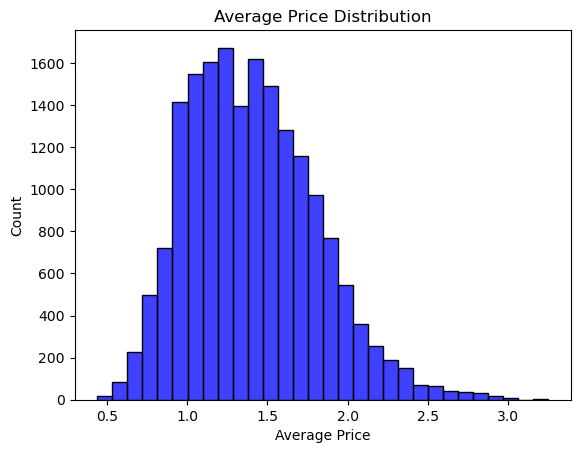

In [25]:
sns.histplot(df['AveragePrice'],color="blue",bins=30)
plt.xlabel("Average Price")
plt.title("Average Price Distribution")
plt.show()

Based on the graph above, it appears that the distribution of average prices is positively skewed.

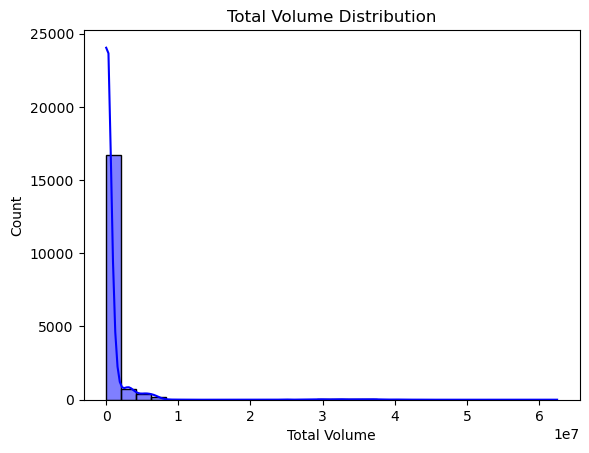

In [26]:
sns.histplot(df['Total Volume'],color="blue",bins=30,kde=True)
plt.xlabel("Total Volume")
plt.title("Total Volume Distribution")
plt.show()

The distribution of data in the total volume column appears to be strongly right-skewed.

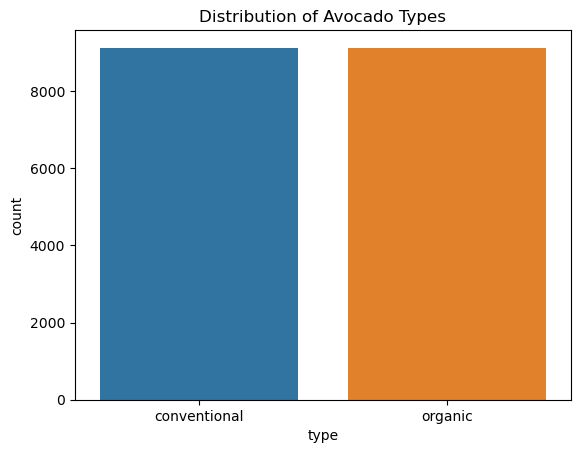

In [27]:
sns.countplot(x='type', data=df)
plt.title('Distribution of Avocado Types')
plt.show()


The counts for both types of avocados, conventional and organic, are equal.

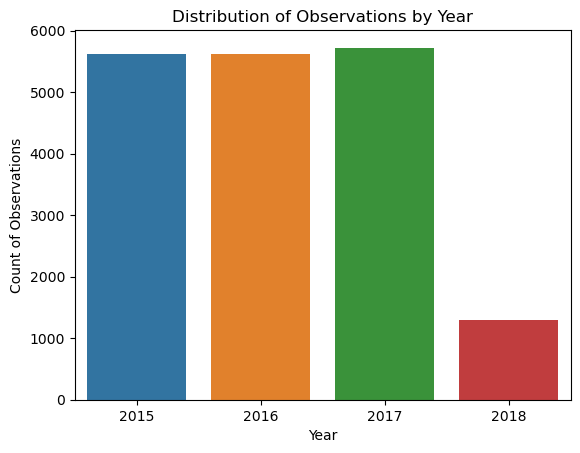

In [28]:
sns.countplot(x='year', data=df)
plt.xlabel('Year')
plt.ylabel('Count of Observations')
plt.title('Distribution of Observations by Year')
plt.show()


The dataset primarily consists of data from the year 2017, with the least amount of data recorded in 2018.

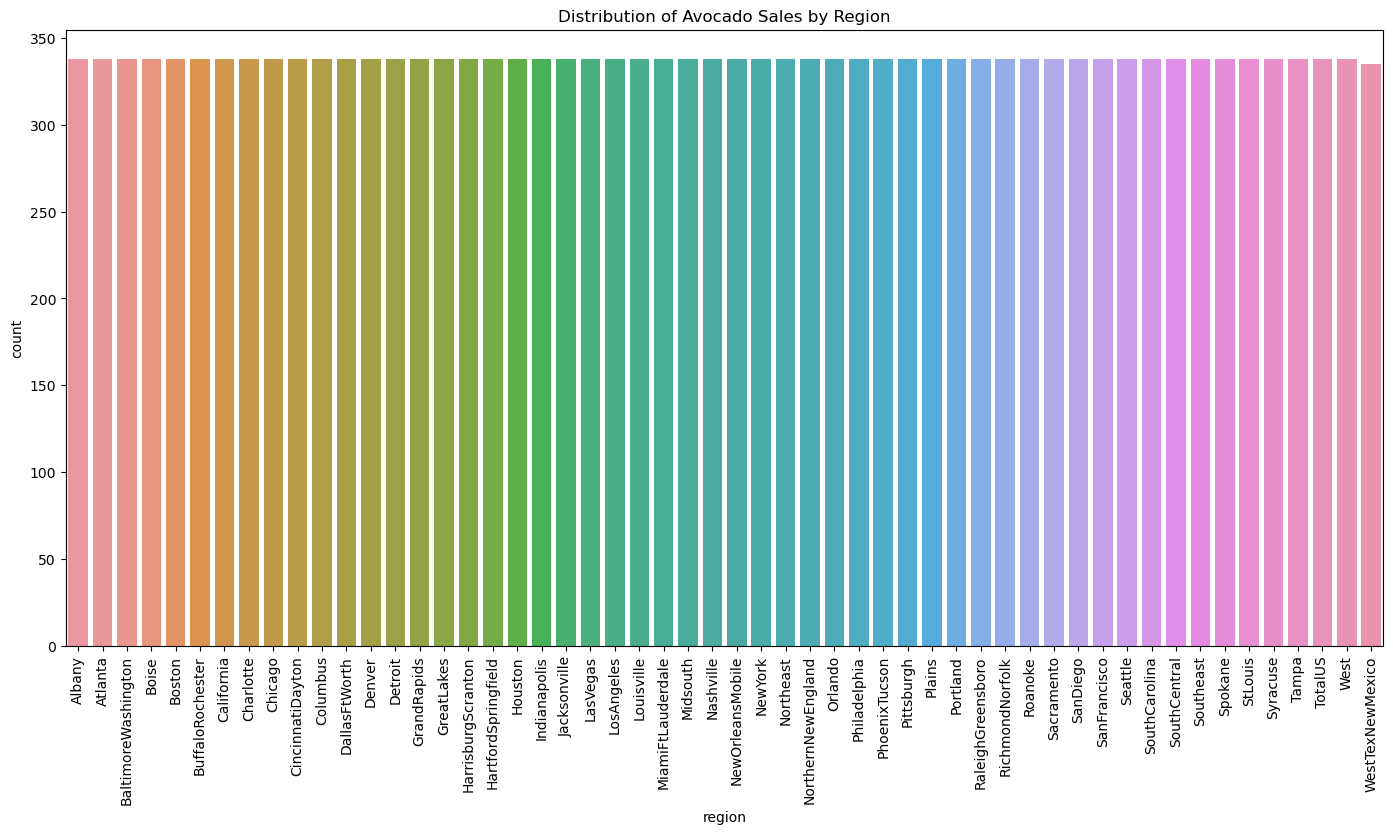

In [29]:
plt.figure(figsize=(17, 8))
sns.countplot(x='region', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Avocado Sales by Region')
plt.show()

The count of entries for each region in the dataset is approximately equal.

# 2.Bivariate analysis-

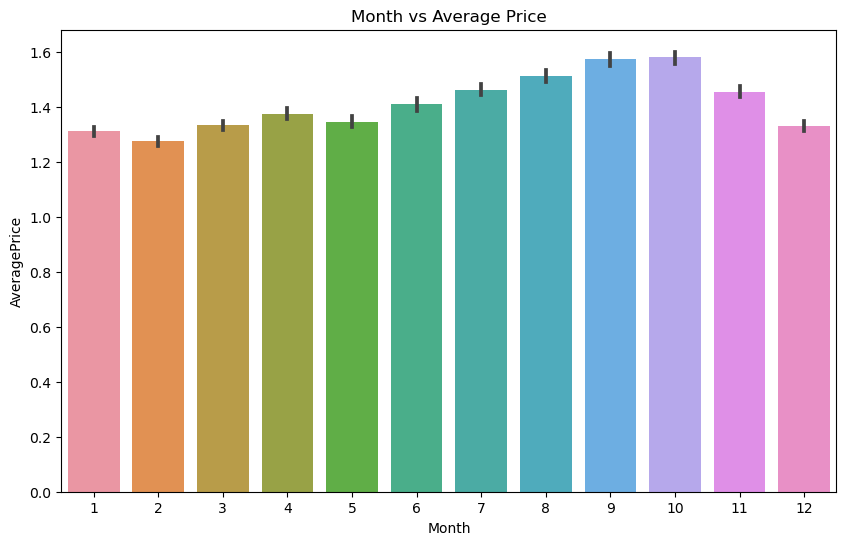

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for 'Month' vs 'AveragePrice'
sns.barplot(x='Month', y='AveragePrice', data=df)  #class Interval

# Add a title to the plot
plt.title('Month vs Average Price')

# Show the plot
plt.show()


The graph above demonstrates that average prices peak in September and October, while they are lowest in February. Additionally, the average price of avocados starts to rise significantly after May, continuing until mid-November.

In [31]:
# Correlation between the target variable and features:

In [32]:
df.select_dtypes(include=['float64', 'int64'])

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14


In [33]:
# Exclude non-numeric columns from correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation between the target variable 'AveragePrice' and numeric features
correlation_with_average_price = numeric_columns.corr()['AveragePrice'].sort_values(ascending=False)
print(correlation_with_average_price)


AveragePrice    1.000000
Month           0.162409
year            0.093197
Day             0.027386
XLarge Bags    -0.117592
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64


Text(0.5, 1.0, 'Region vs Average Price')

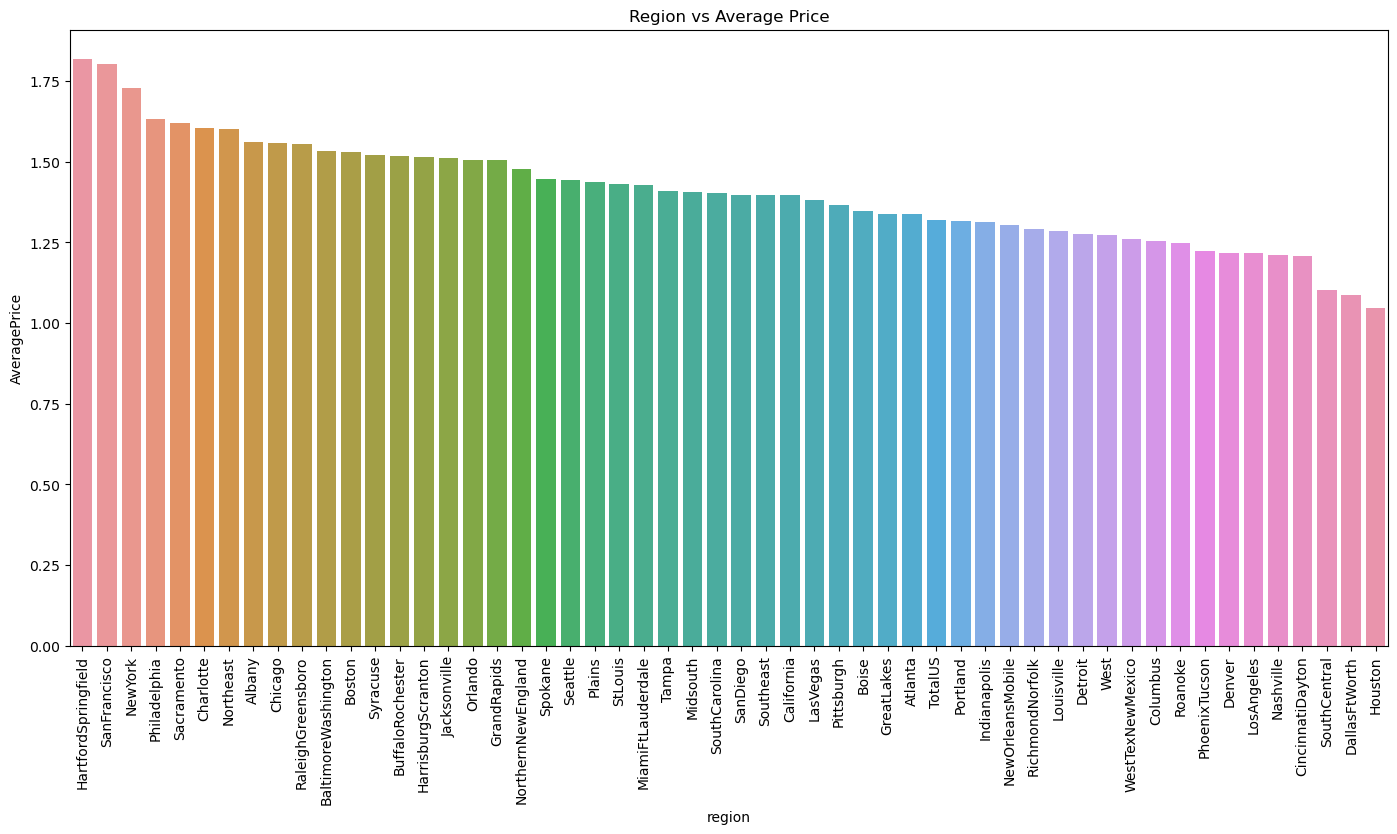

In [34]:
plt.figure(figsize=(17, 8), dpi=100)
sns.barplot(x=df.groupby('region')['AveragePrice'].mean().sort_values(ascending=False).index,
            y=df.groupby('region')['AveragePrice'].mean().sort_values(ascending=False),
            data=df)
plt.xticks(rotation=90)
plt.title('Region vs Average Price')


The plot above reveals that the average price for avocados is highest in regions like Hartford-Springfield and lowest in Houston.

Text(0.5, 1.0, 'month vs AveragePrice')

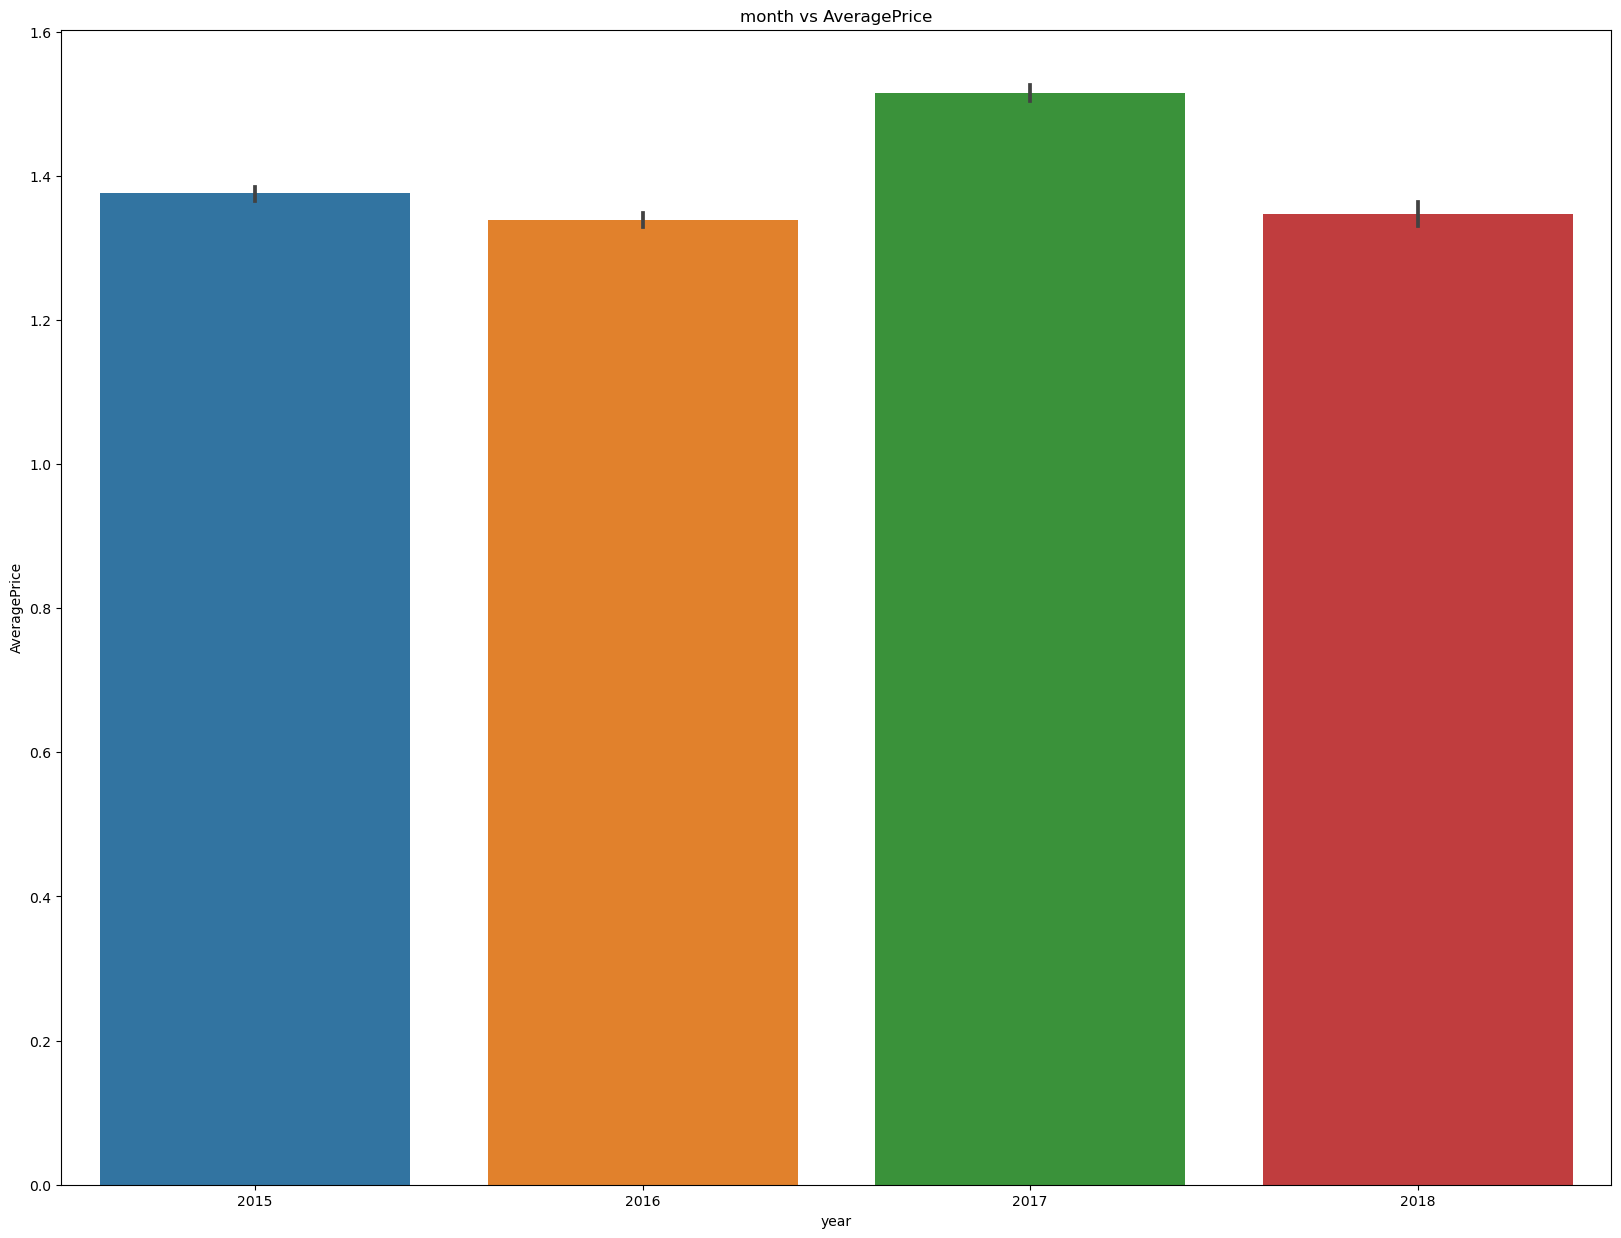

In [35]:
plt.figure(figsize=(20,15))
sns.barplot(x='year',y='AveragePrice',data=df)
plt.title('month vs AveragePrice')

In contrast to other years, the average price of avocados was lowest in 2016. Conversely, in 2017, the average price of avocados surged significantly, surpassing that of other years.

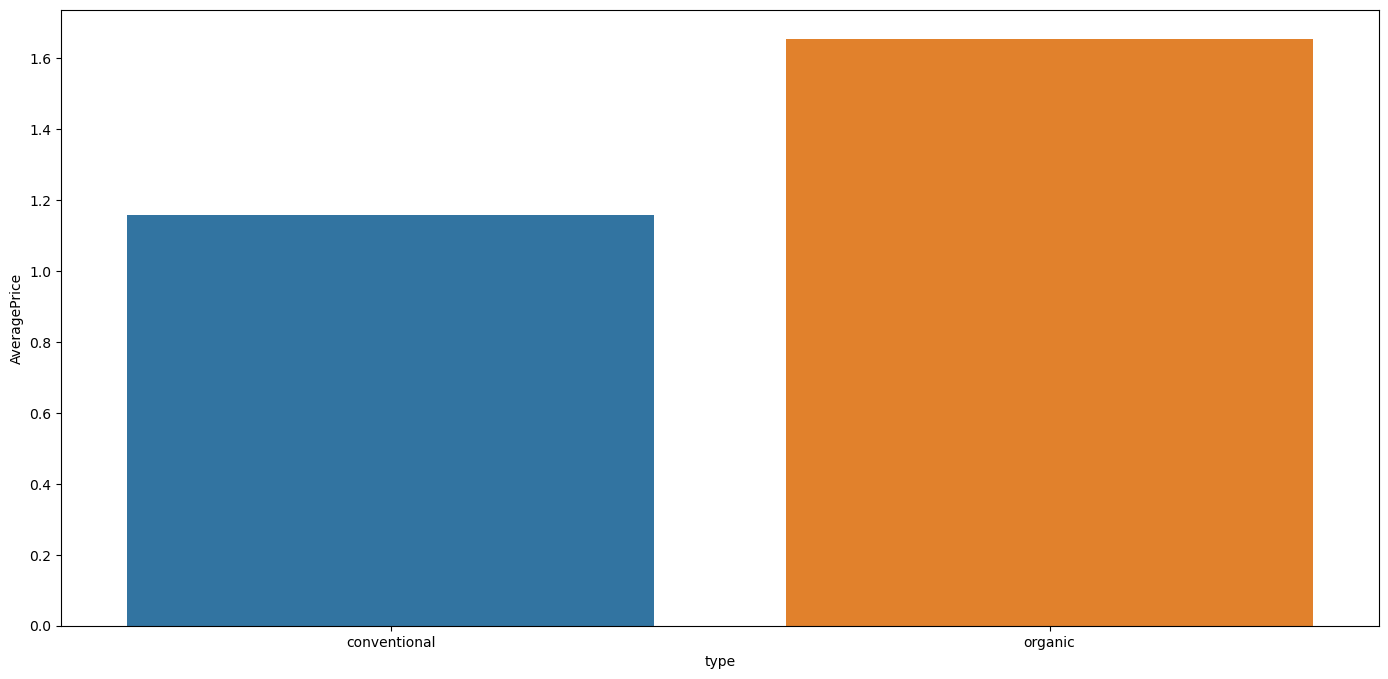

In [36]:
plt.figure(figsize=(17, 8), dpi=100)
sns.barplot(x=df.groupby('type')['AveragePrice'].mean().index,
            y=df.groupby('type')['AveragePrice'].mean(),
            data=df)
plt.show()

Organic avocados typically command a higher average price compared to conventional ones.

<Figure size 2000x1500 with 0 Axes>

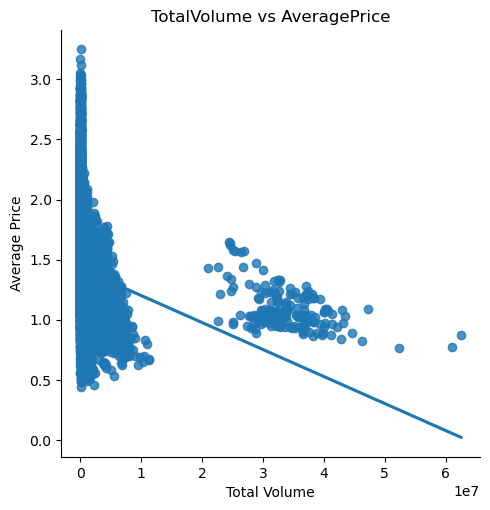

In [37]:
plt.figure(figsize=(20, 15))
sns.lmplot(x='Total Volume', y='AveragePrice', data=df,ci=None)
plt.title('TotalVolume vs AveragePrice')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.show()

The average price and total volume exhibit a negative correlation with each other.

<Figure size 2000x1500 with 0 Axes>

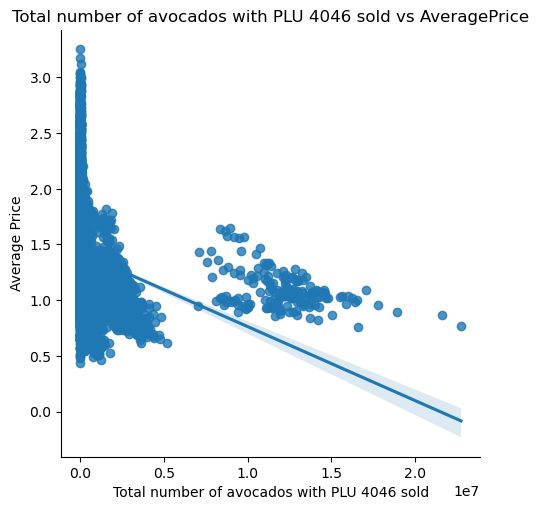

In [38]:
plt.figure(figsize=(20, 15))
sns.lmplot(x='4046', y='AveragePrice', data=df)
plt.title('Total number of avocados with PLU 4046 sold vs AveragePrice')
plt.xlabel('Total number of avocados with PLU 4046 sold')
plt.ylabel('Average Price')
plt.show()


The total number of avocados sold with PLU 4046 and the average price of avocados exhibit a negative correlation with each other.

<Figure size 2000x1500 with 0 Axes>

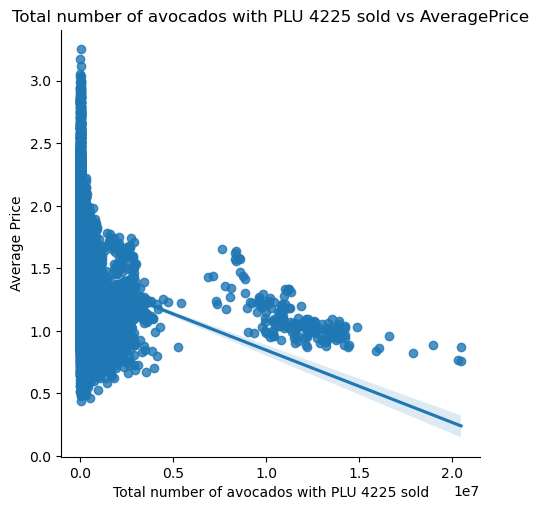

In [39]:
plt.figure(figsize=(20, 15))
sns.lmplot(x='4225', y='AveragePrice', data=df)
plt.title('Total number of avocados with PLU 4225 sold vs AveragePrice')
plt.xlabel('Total number of avocados with PLU 4225 sold')
plt.ylabel('Average Price')
plt.show()

There is a negative correlation between the total number of avocados sold with PLU 4225 and the average price.

<Figure size 2000x1500 with 0 Axes>

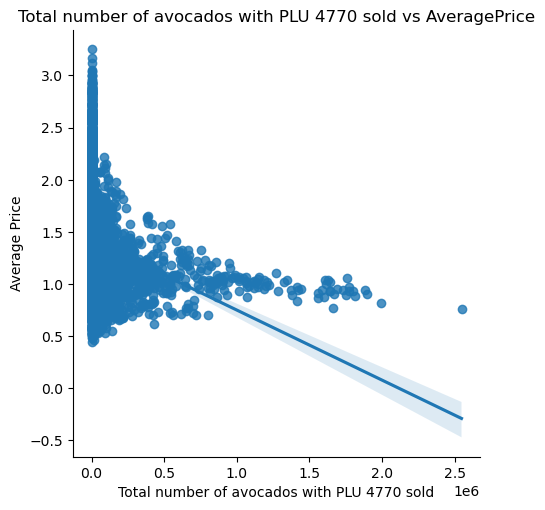

In [40]:
plt.figure(figsize=(20, 15))
sns.lmplot(x='4770', y='AveragePrice', data=df)
plt.title('Total number of avocados with PLU 4770 sold vs AveragePrice')
plt.xlabel('Total number of avocados with PLU 4770 sold')
plt.ylabel('Average Price')
plt.show()


There is a negative correlation between the total number of avocados sold with PLU 4770 and the average price.

<Figure size 2000x1500 with 0 Axes>

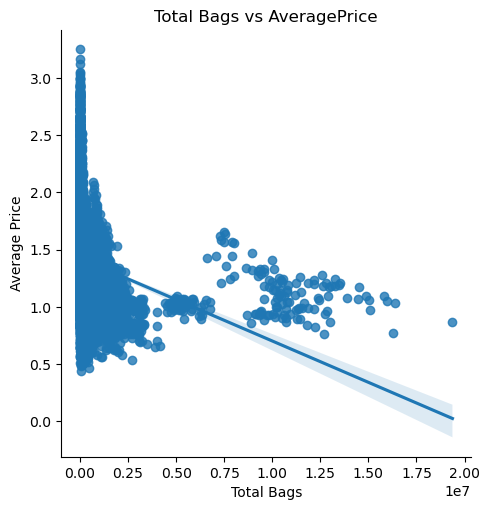

In [41]:
plt.figure(figsize=(20, 15))
sns.lmplot(x='Total Bags', y='AveragePrice', data=df)
plt.title('Total Bags vs AveragePrice')
plt.xlabel('Total Bags')
plt.ylabel('Average Price')
plt.show()


Total Bags & AveragePrice has Negetive correlationship with each other.

<Figure size 2000x1500 with 0 Axes>

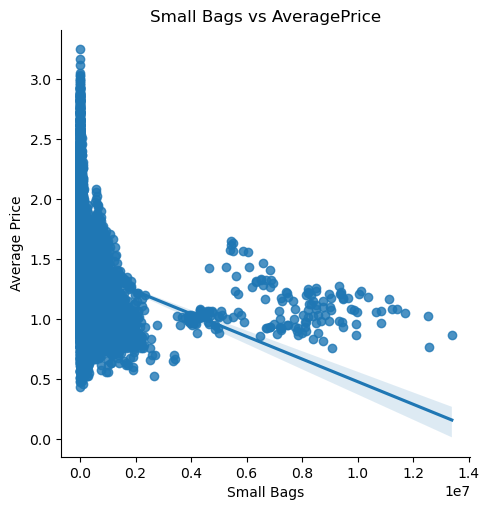

In [42]:
plt.figure(figsize=(20, 15))
sns.lmplot(x='Small Bags', y='AveragePrice', data=df)
plt.title('Small Bags vs AveragePrice')
plt.xlabel('Small Bags')
plt.ylabel('Average Price')
plt.show()

Small Bags & AveragePrice has negetive correlationship with each other.

<Figure size 2000x1500 with 0 Axes>

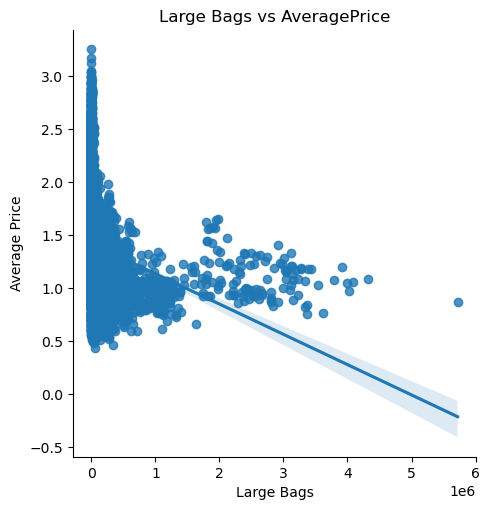

In [43]:
plt.figure(figsize=(20, 15))
sns.lmplot(x='Large Bags', y='AveragePrice', data=df)
plt.title('Large Bags vs AveragePrice')
plt.xlabel('Large Bags')
plt.ylabel('Average Price')
plt.show()


There is a negative correlation between the number of avocados sold in large bags and the average price.

<Figure size 2000x1500 with 0 Axes>

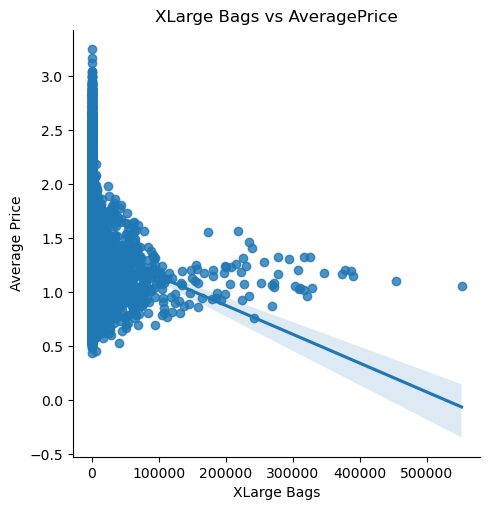

In [44]:
plt.figure(figsize=(20, 15))
sns.lmplot(x='XLarge Bags', y='AveragePrice', data=df)
plt.title('XLarge Bags vs AveragePrice')
plt.xlabel('XLarge Bags')
plt.ylabel('Average Price')
plt.show()


There is a negative correlation between the number of avocados sold in extra-large bags and the average price.

<Figure size 2000x1500 with 0 Axes>

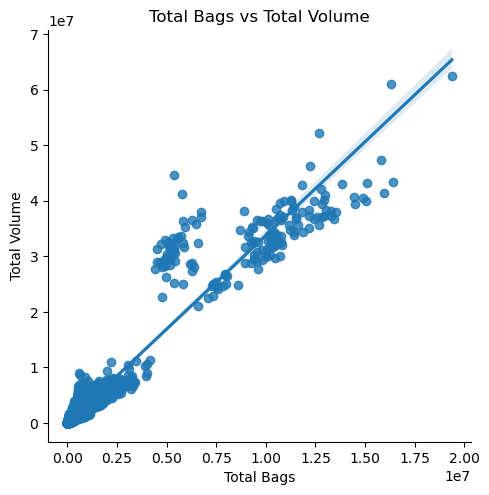

In [45]:
plt.figure(figsize=(20, 15))
sns.lmplot(x='Total Bags', y='Total Volume', data=df)
plt.title('Total Bags vs Total Volume')
plt.xlabel('Total Bags')
plt.ylabel('Total Volume')
plt.show()


There is a positive correlation between the total number of bags sold and the average price.








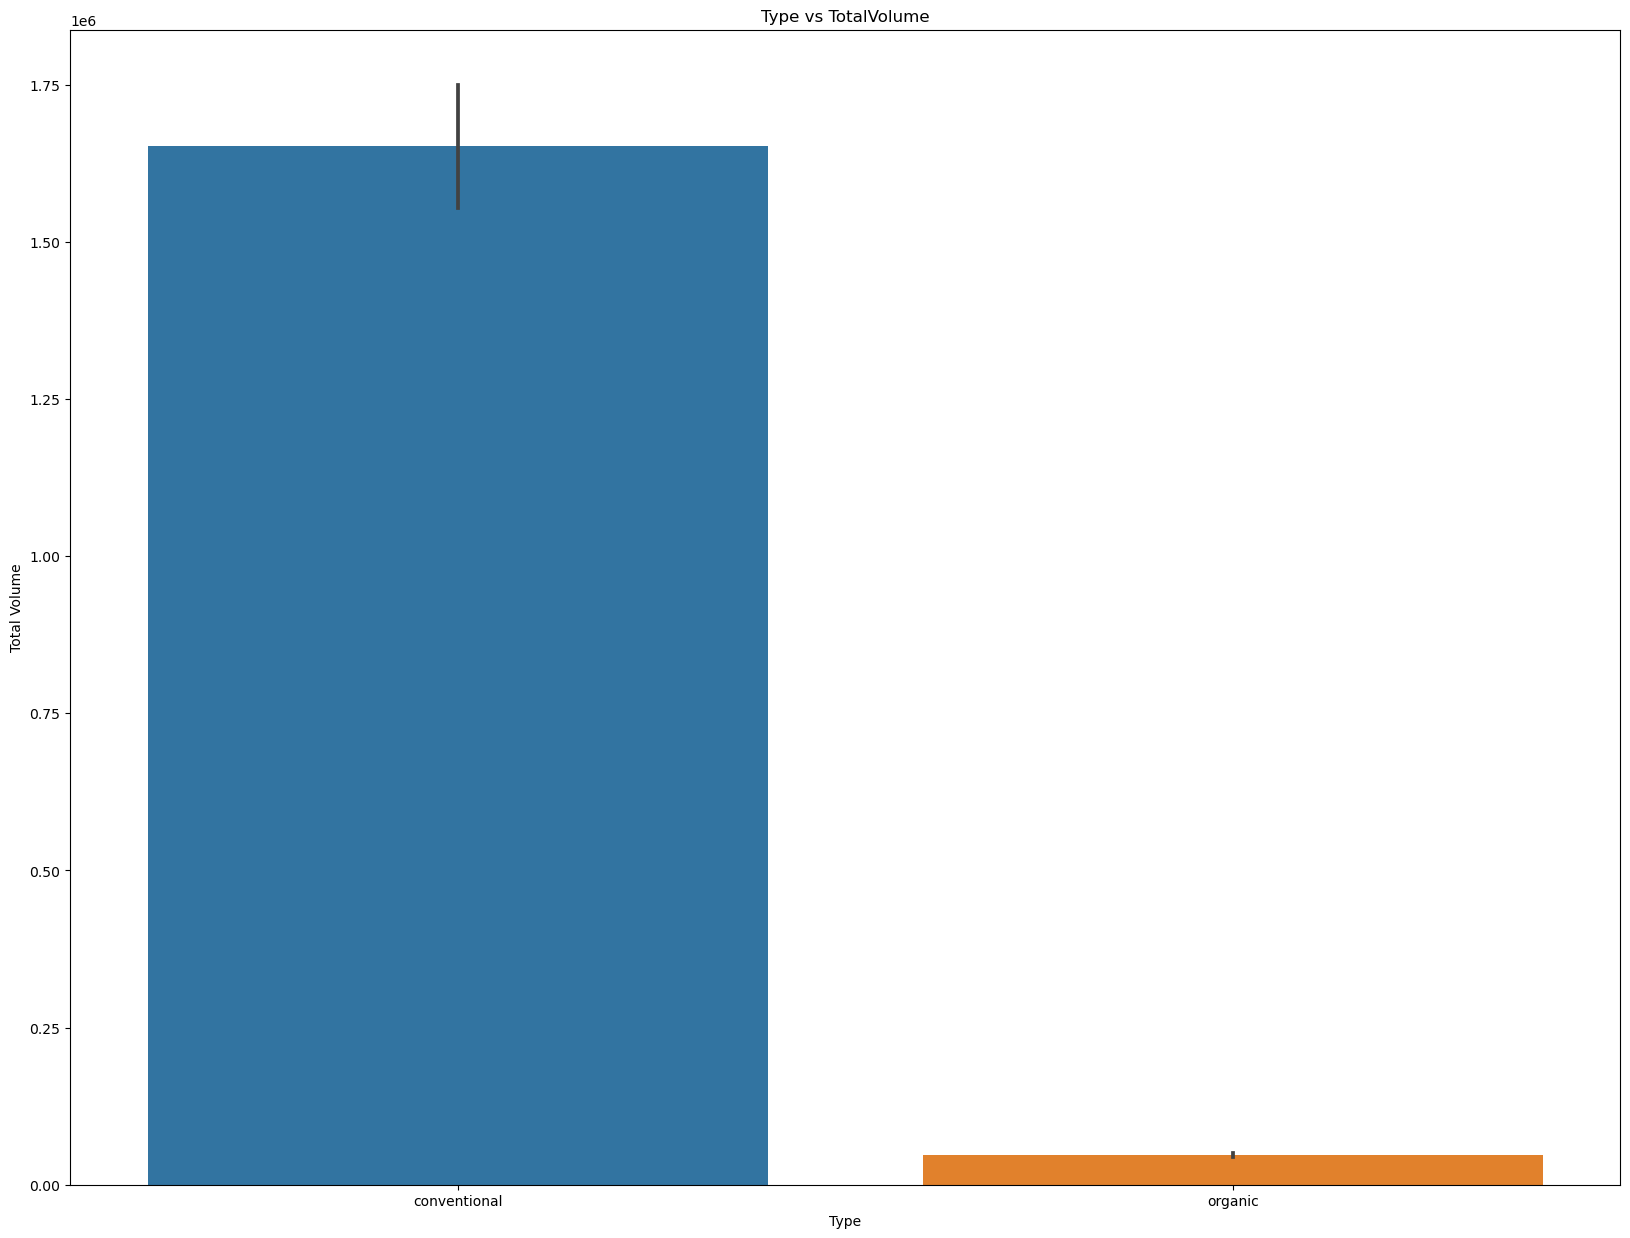

In [46]:
plt.figure(figsize=(20, 15))
sns.barplot(x='type', y='Total Volume', data=df)
plt.title('Type vs TotalVolume')
plt.xlabel('Type')
plt.ylabel('Total Volume')
plt.show()


Conventional type of avocados sold higher than organic type.

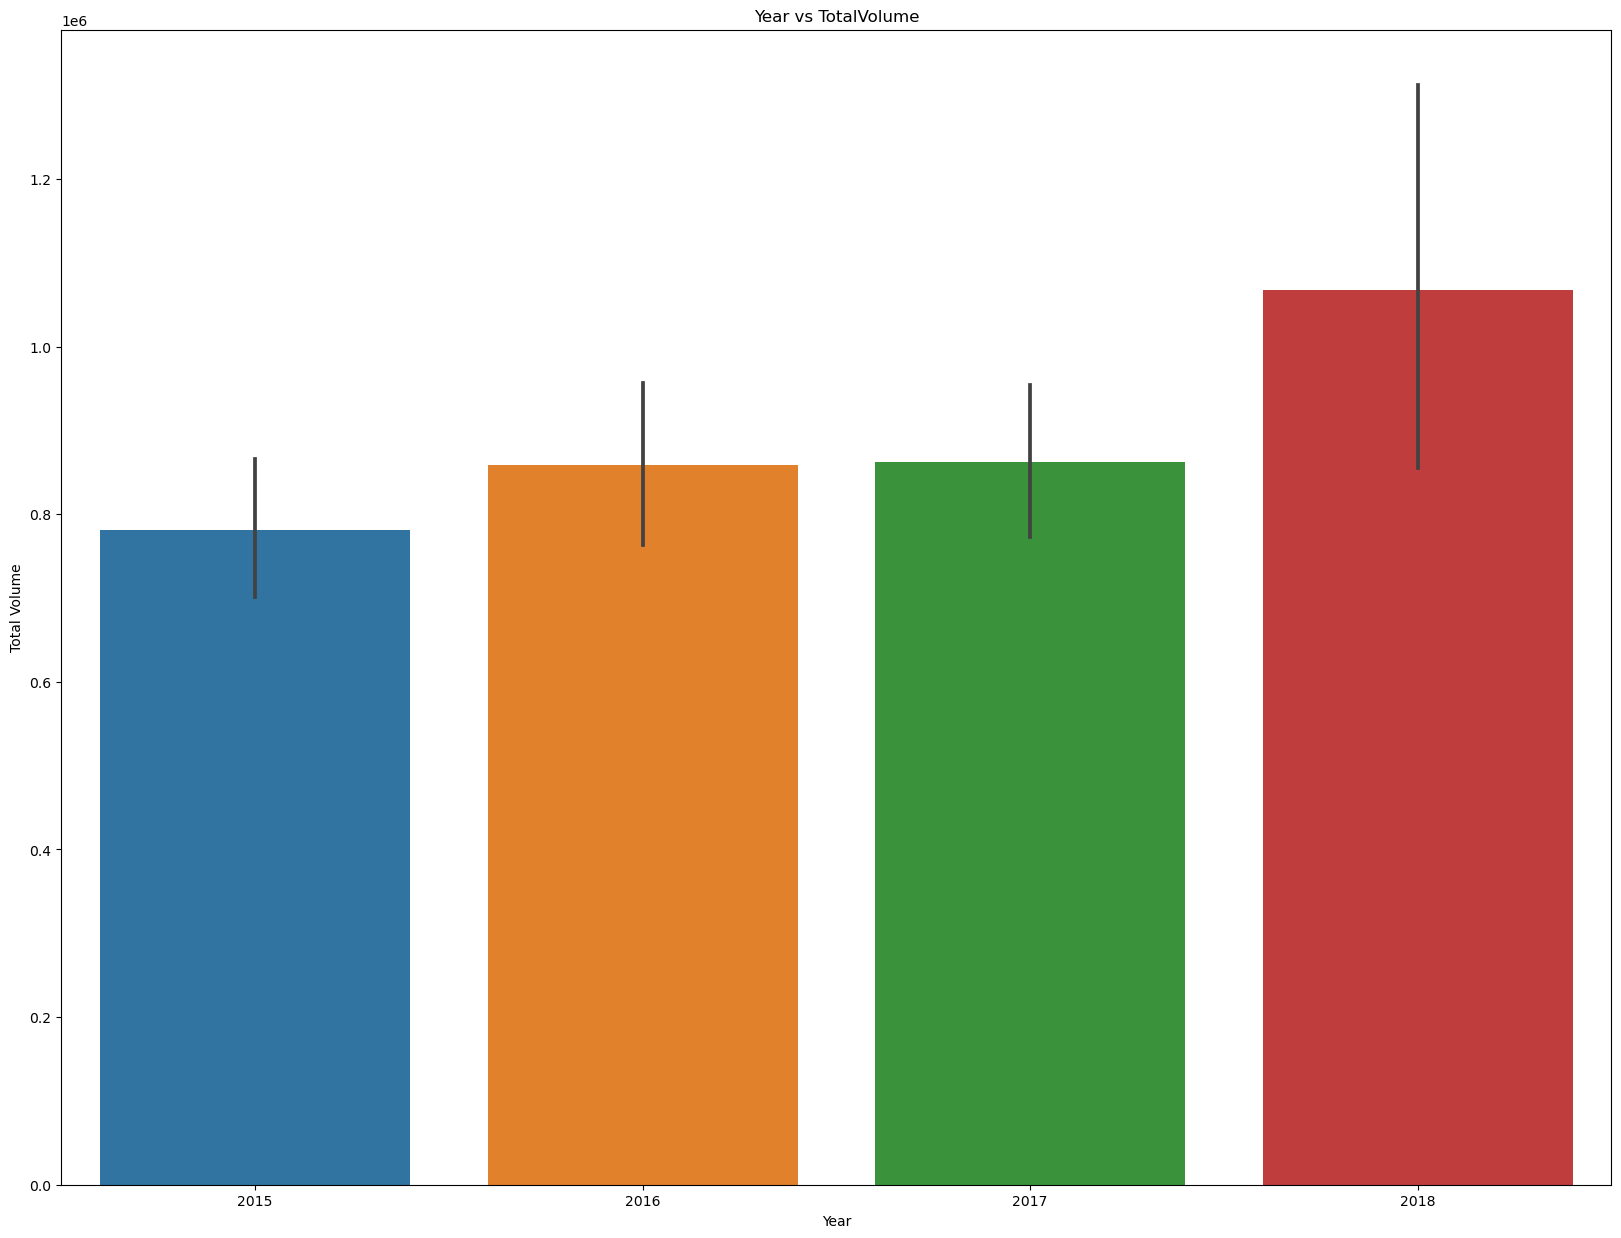

In [47]:
plt.figure(figsize=(20, 15))
sns.barplot(x='year', y='Total Volume', data=df)
plt.title('Year vs TotalVolume')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.show()


The highest volume of avocados was sold in the year 2018.

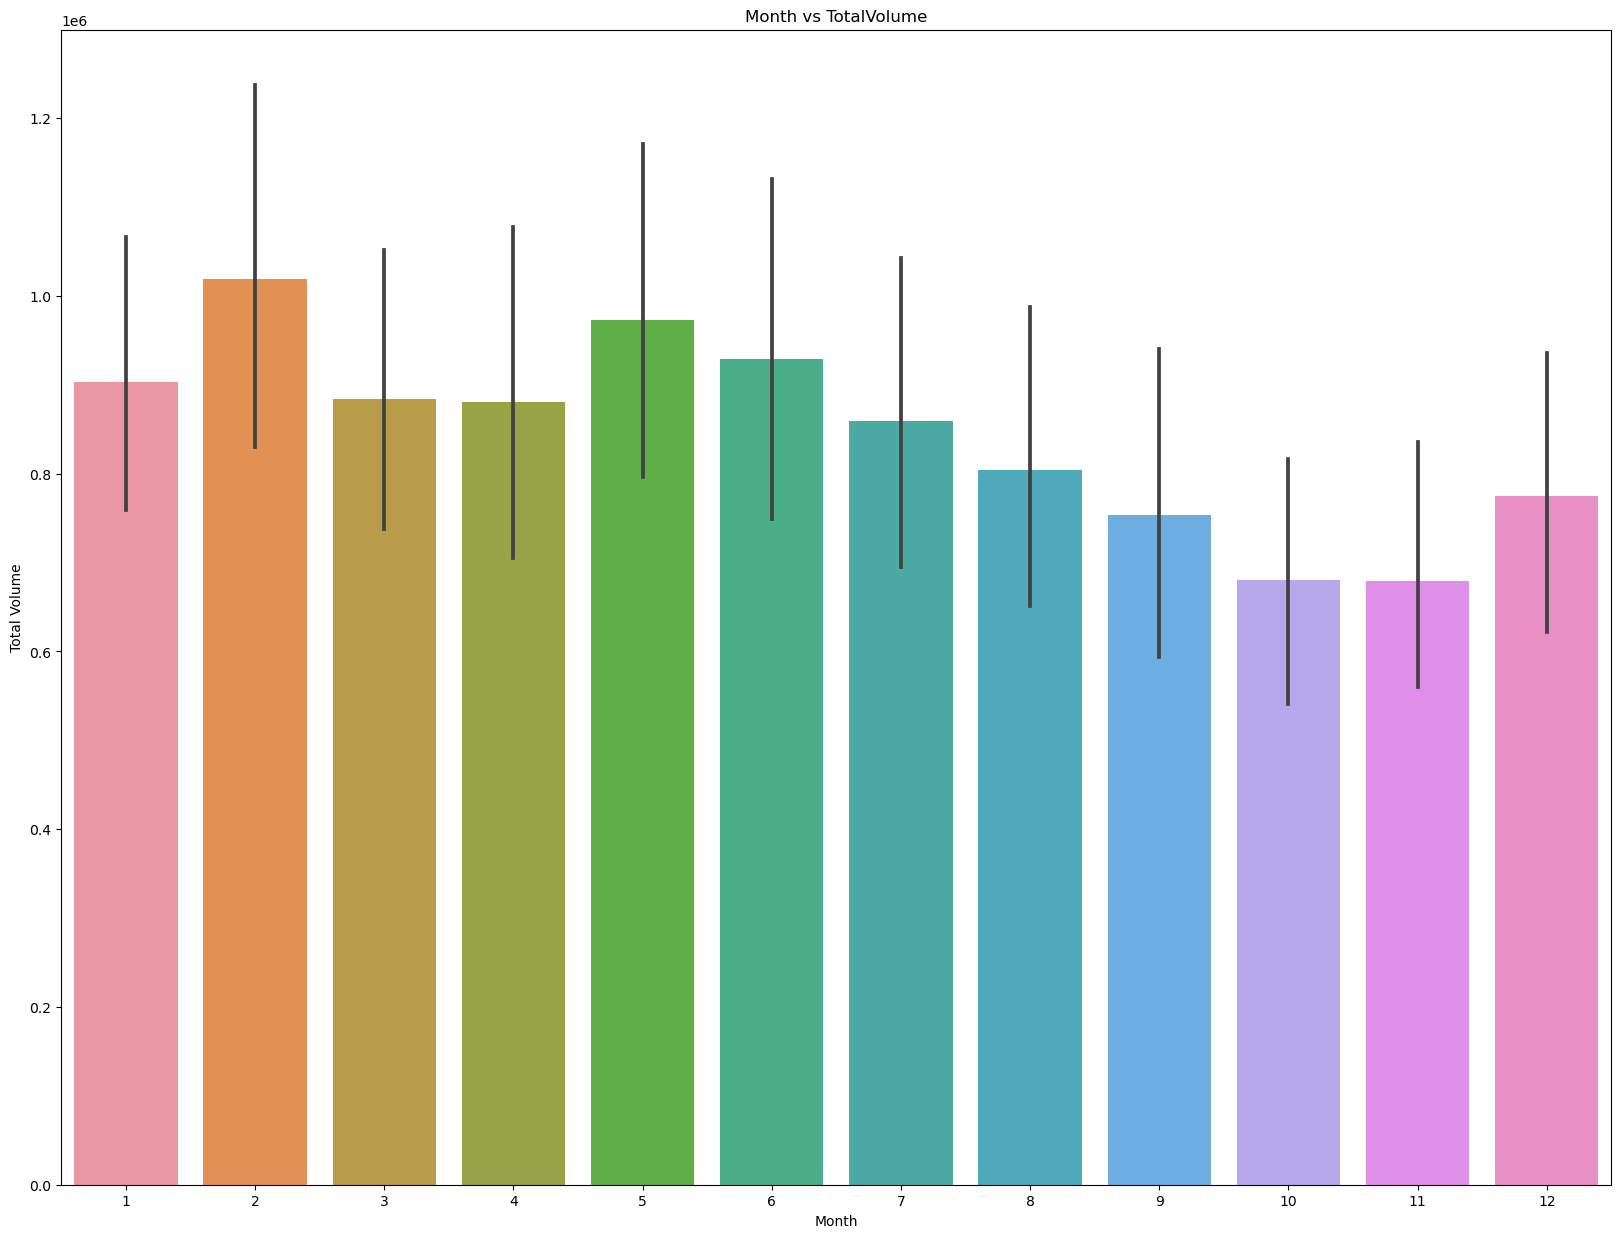

In [48]:
plt.figure(figsize=(20, 15))
sns.barplot(x='Month', y='Total Volume', data=df)
plt.title('Month vs TotalVolume')
plt.xlabel('Month')
plt.ylabel('Total Volume')
plt.show()


The highest volume of avocados was sold in February, while the lowest volume was sold in November.

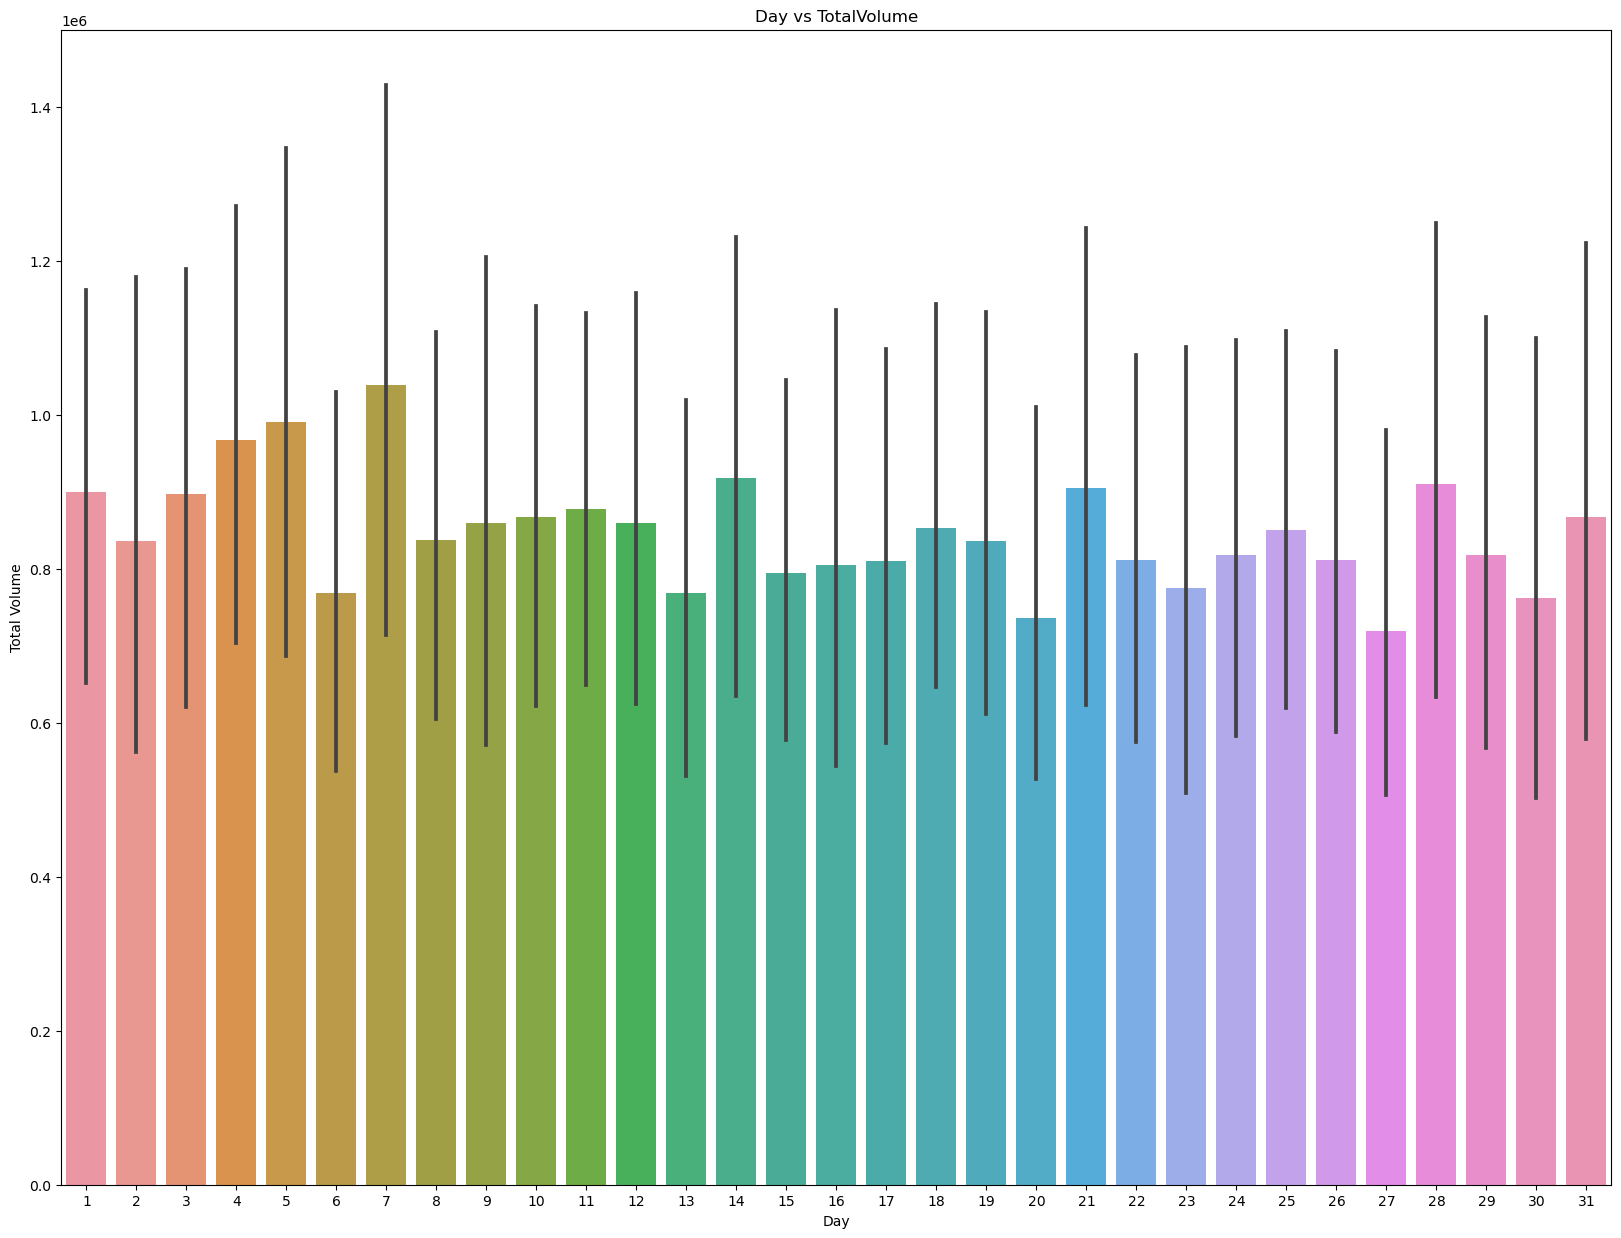

In [49]:
plt.figure(figsize=(20, 15))
sns.barplot(x='Day', y='Total Volume', data=df)
plt.title('Day vs TotalVolume')
plt.xlabel('Day')
plt.ylabel('Total Volume')
plt.show()


The highest volume of avocados was sold on the 7th day of the month.

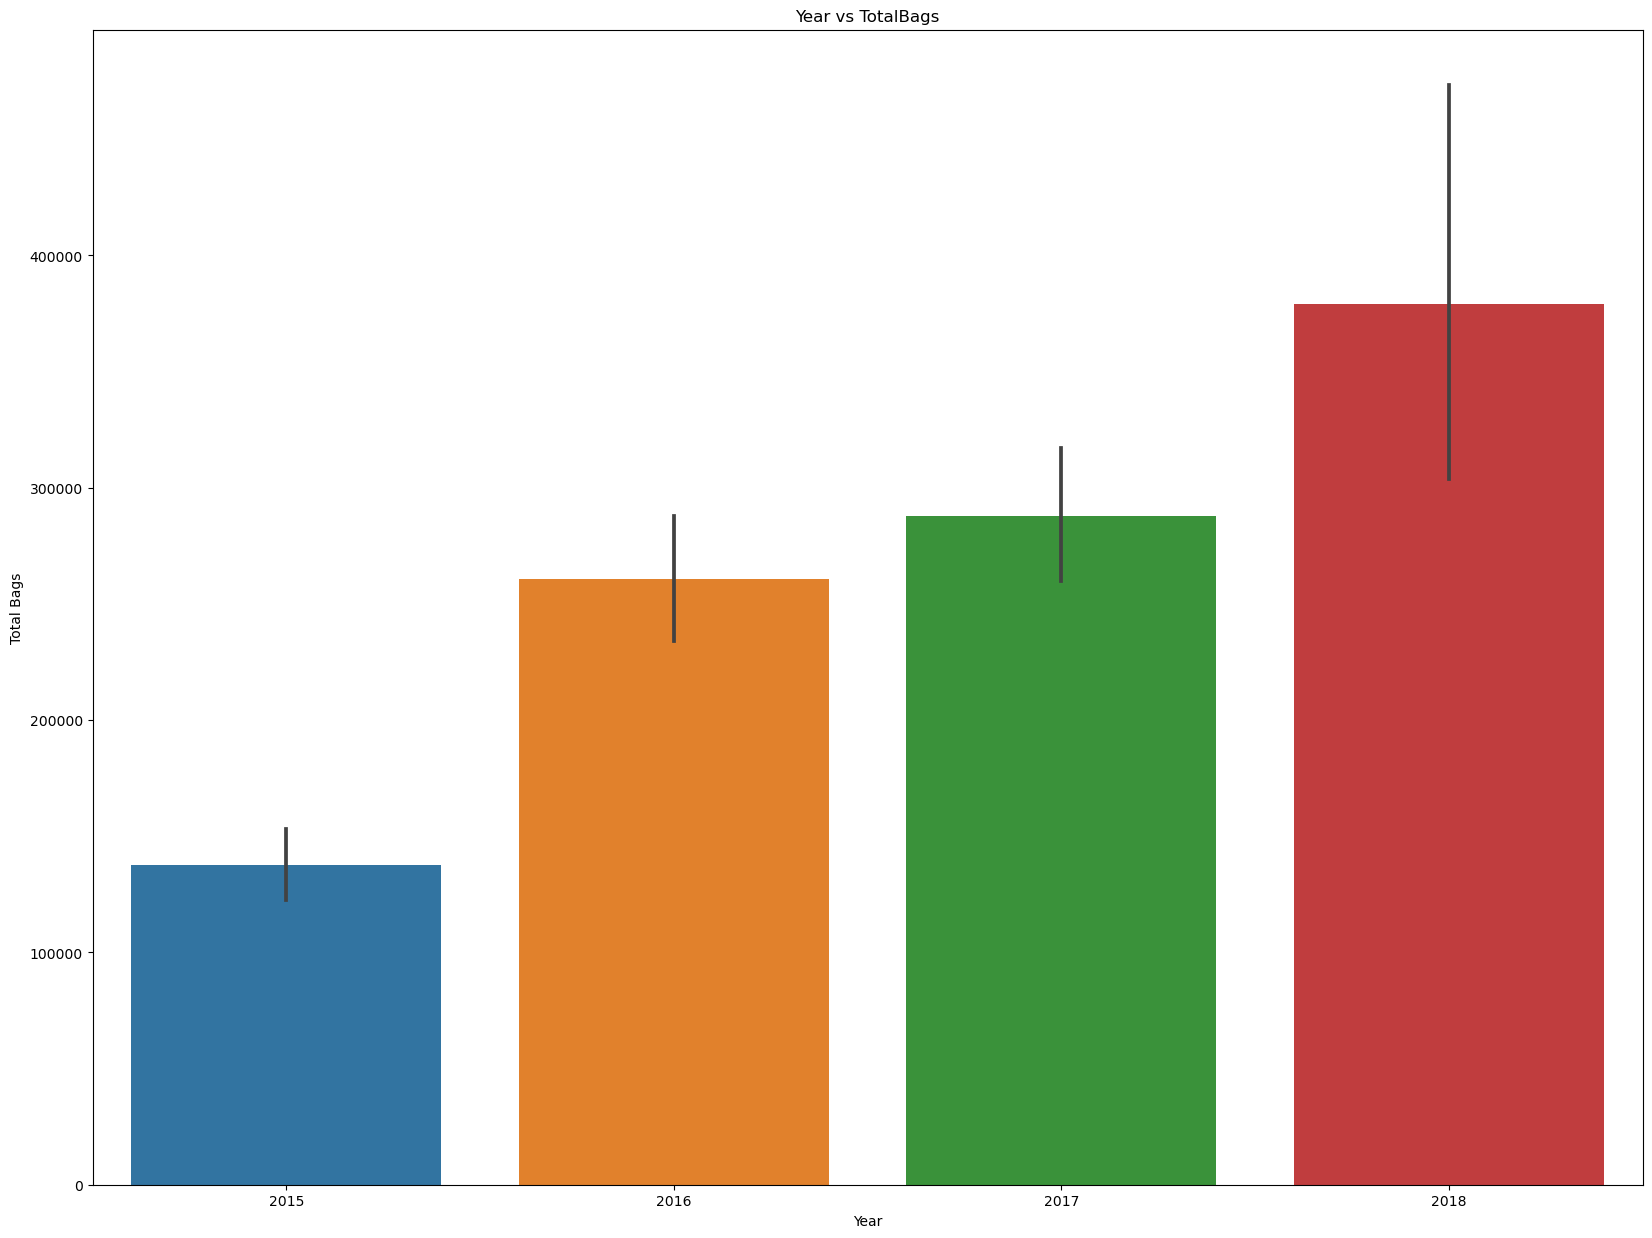

In [50]:
plt.figure(figsize=(20, 15))
sns.barplot(x='year', y='Total Bags', data=df)
plt.title('Year vs TotalBags')
plt.xlabel('Year')
plt.ylabel('Total Bags')
plt.show()


The correlation is evident: with the highest avocado sales in 2018, the highest number of bags were also used, while in 2015, with minimal avocado sales, the least number of bags were used.

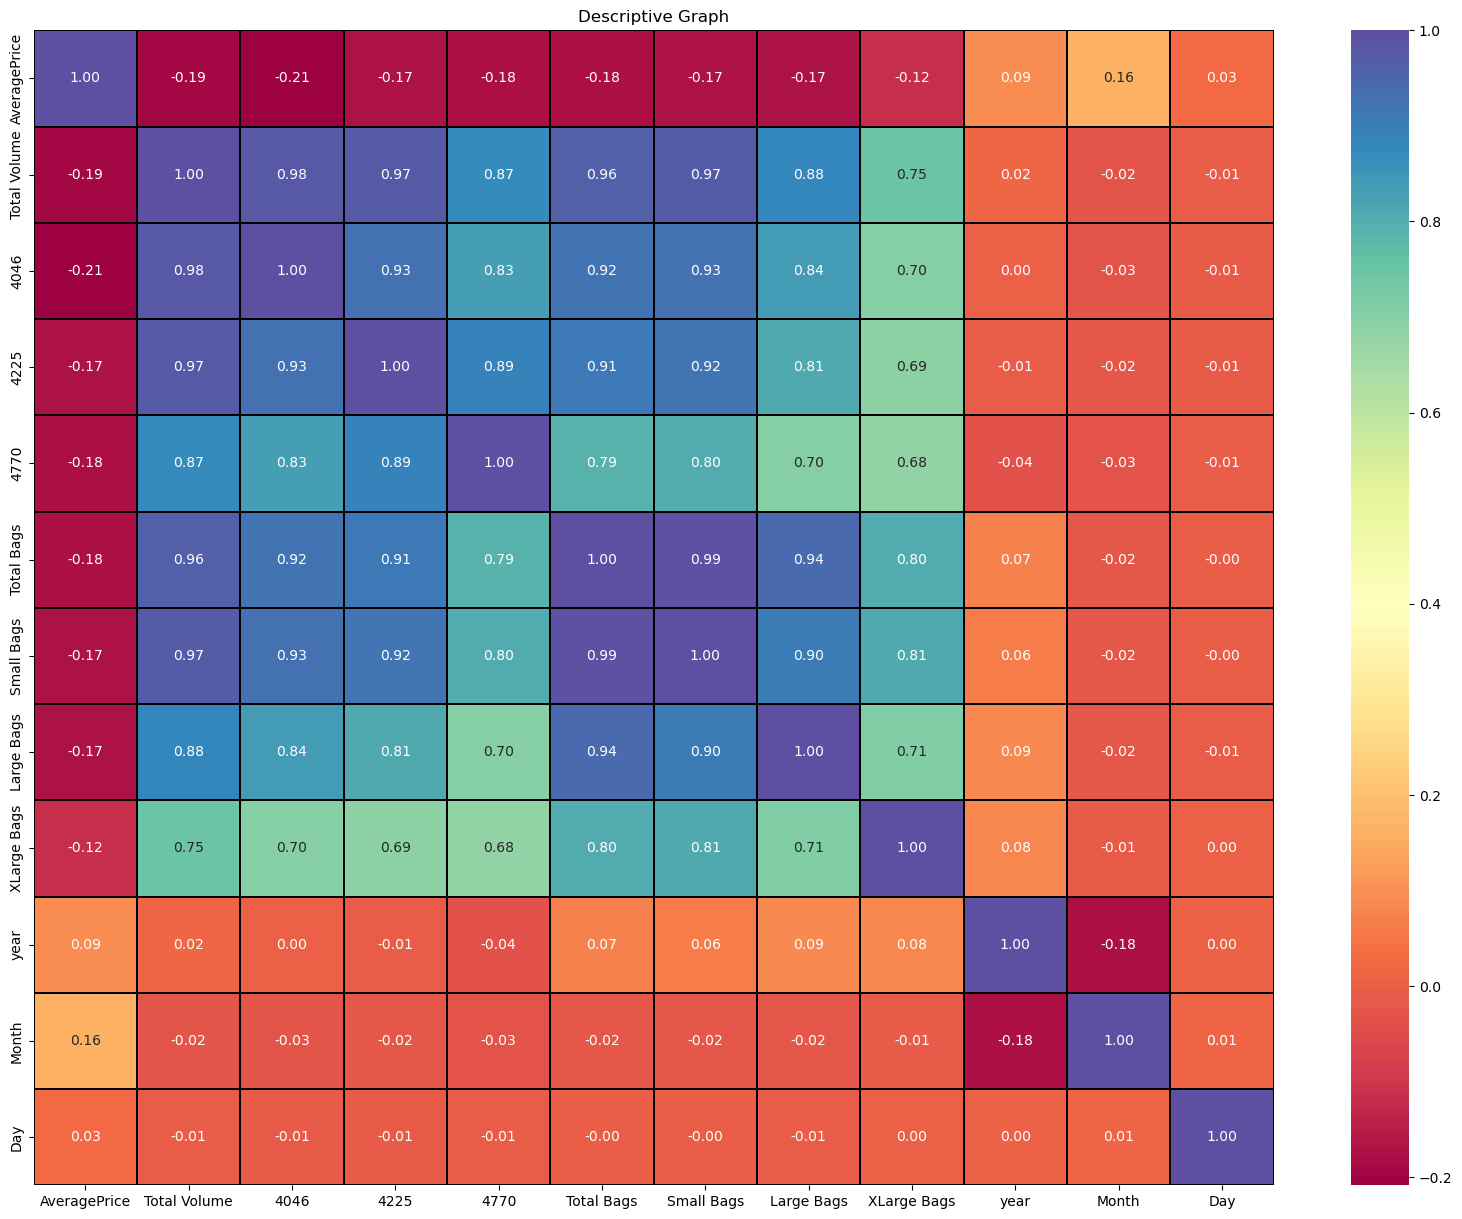

In [51]:
# Exclude non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(numeric_df.corr(), annot=True, fmt='0.2f', linewidth=0.2, linecolor='Black', cmap='Spectral')
plt.title('Descriptive Graph')
plt.show()


Observations-
1. There is a strong positive correlation of 98% between the total volume of avocados and the PLU 4046.
2. The total volume of avocados shows a high positive correlation of 97% with the PLU 4225.
3. A notable positive correlation of 87% exists between the total volume of avocados and the PLU 4770.
4. There is a substantial positive correlation of 96% between the total volume of avocados and the total number of bags used.
5. The total volume of avocados exhibits a strong positive correlation of 97% with the number of small bags used.
6. A significant positive correlation of 88% is observed between the total volume of avocados and the number of large bags used.
7. The PLU 4046 and PLU 4225 demonstrate a strong positive correlation of 93%.
8. There is a substantial positive correlation of 93% between the number of small bags used and the PLU 4046.
9. The number of small bags used shows a strong positive correlation of 92% with the PLU 4225.
10. A noteworthy positive correlation of 80% exists between the number of small bags used and the PLU 4770.
11. The number of small bags used exhibits an exceptionally strong positive correlation of 99% with the total number of bags used.
12. There is a substantial positive correlation of 94% between the total number of bags used and the number of large bags used.

These observations highlight the strong positive relationships between different features in the dataset, providing valuable insights into the avocado sales and bag usage patterns.

# 3.Multivariate analysis-

observations:

- There is a positive correlation between Total volume and PLU 4046.
- Total volume and PLU 4225 show a positive correlation.
- Total volume and PLU 4770 exhibit a positive correlation.
- There is a positive correlation between Total volume and Total bags.
- Total volume and Small bags have a positive correlation.
- Total volume and Large bags demonstrate a positive correlation.
- PLU 4046 and PLU 4225 show a positive correlation.
- Small bags and PLU 4046 exhibit a positive correlation.
- Small bags and PLU 4225 demonstrate a positive correlation.
- Small bags and PLU 4770 show a positive correlation.
- There is a positive correlation between Small bags and Total bags.
- Total bags and Large bags exhibit a positive correlation.


In [52]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [53]:
x=df.drop(columns=['type','region'],axis=1)

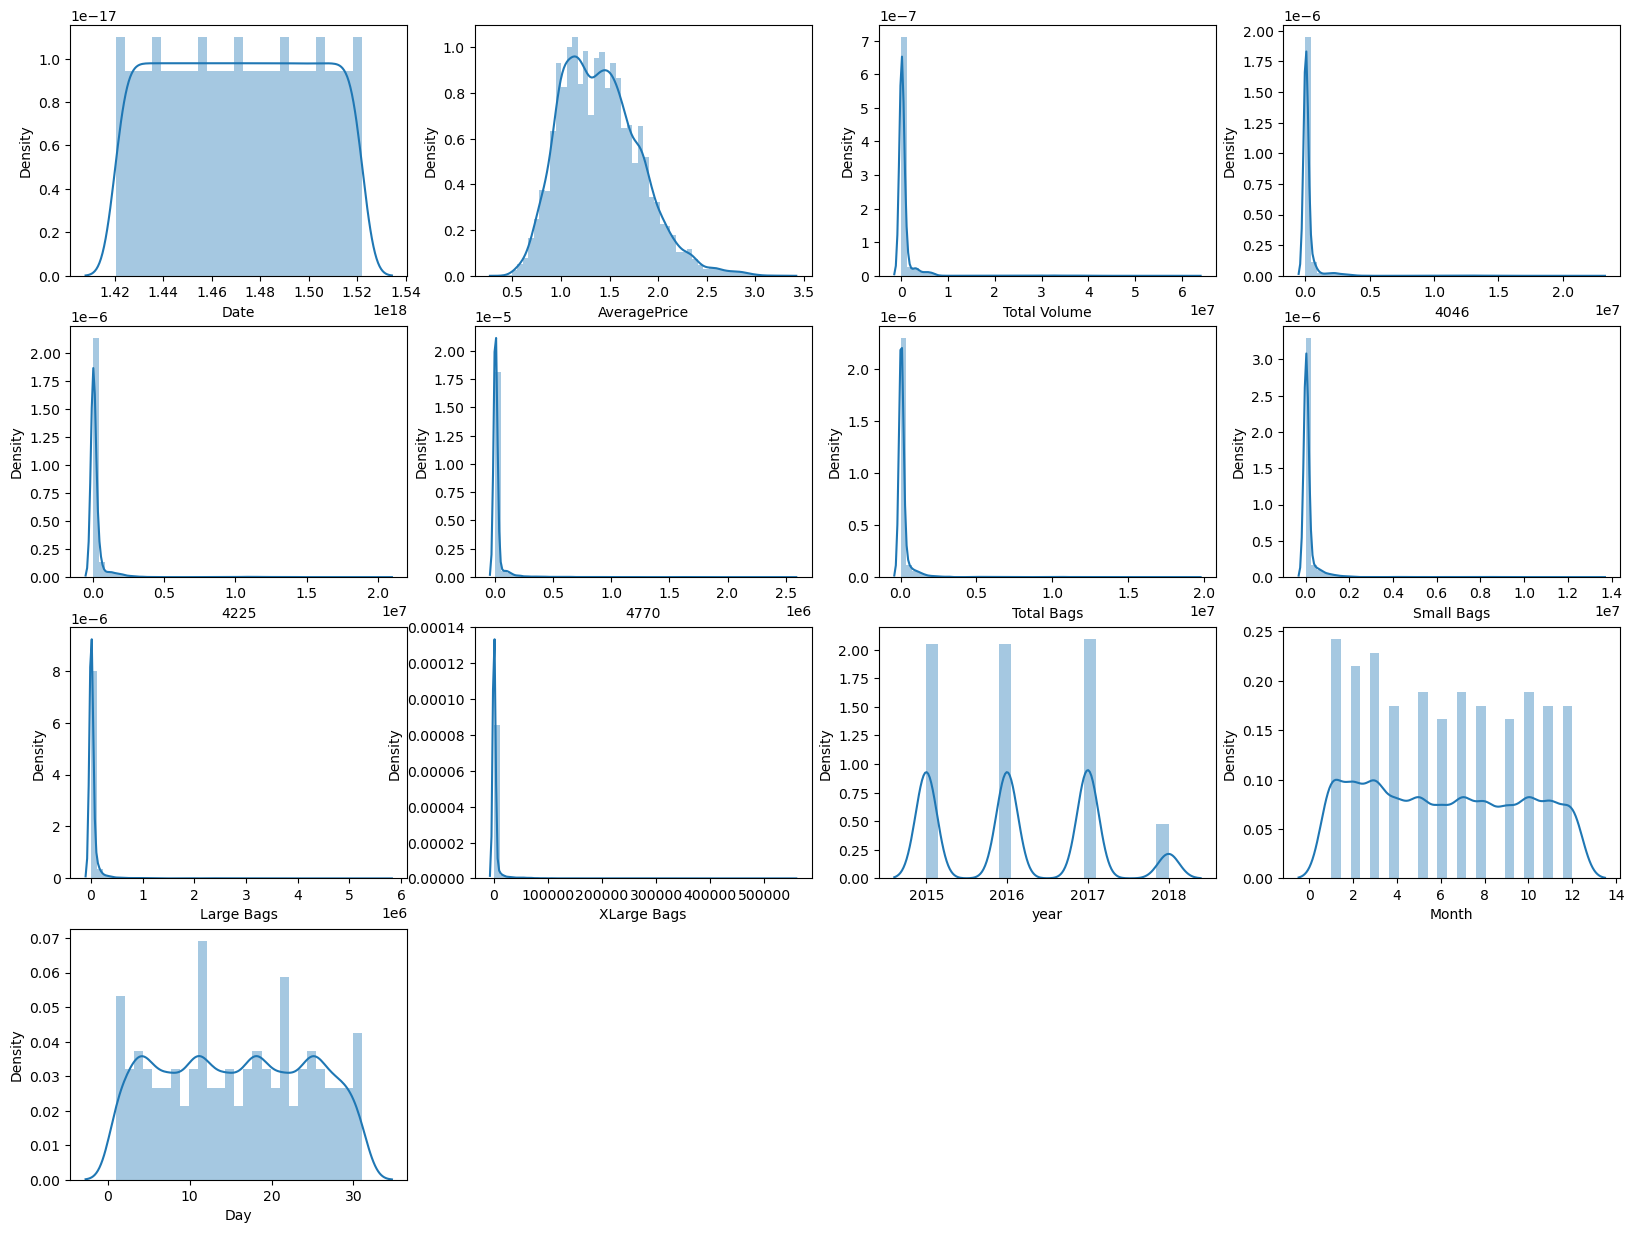

In [54]:
plt.figure(figsize=(20,15))
plotnumber=1


for column in x.columns:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1   
plt.show()   

It appears that there is skewness present in columns such as Total Volume, 4046, 4225, 4770, Small Bags, Large Bags, and XLarge Bags. These skewed distributions may need to be addressed to improve the performance of our analysis.

In [55]:
# Exclude datetime columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the skewness
skewness = numeric_df.skew()

# Print the skewness of each column
print(skewness)


AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
Day              0.014310
dtype: float64


Upon cross-checking, it has been confirmed that skewness exists in columns such as Total Volume, 4046, 4225, 4770, Small Bags, Large Bags, and XLarge Bags.

# Using the Power Transformer method, we aim to eliminate skewness from the dataset.

In [56]:
from sklearn.preprocessing import PowerTransformer

In [57]:
features=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

In [58]:
x=PowerTransformer(method='yeo-johnson') 
df[features]=x.fit_transform(df[features].values)

In [59]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,conventional,2015,Albany,12,27
1,2015-12-20,1.35,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,conventional,2015,Albany,12,20
2,2015-12-13,0.93,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,conventional,2015,Albany,12,13
3,2015-12-06,1.08,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,conventional,2015,Albany,12,6
4,2015-11-29,1.28,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,organic,2018,WestTexNewMexico,1,14


In [60]:
x=df.drop(columns=['type','region'],axis=1)

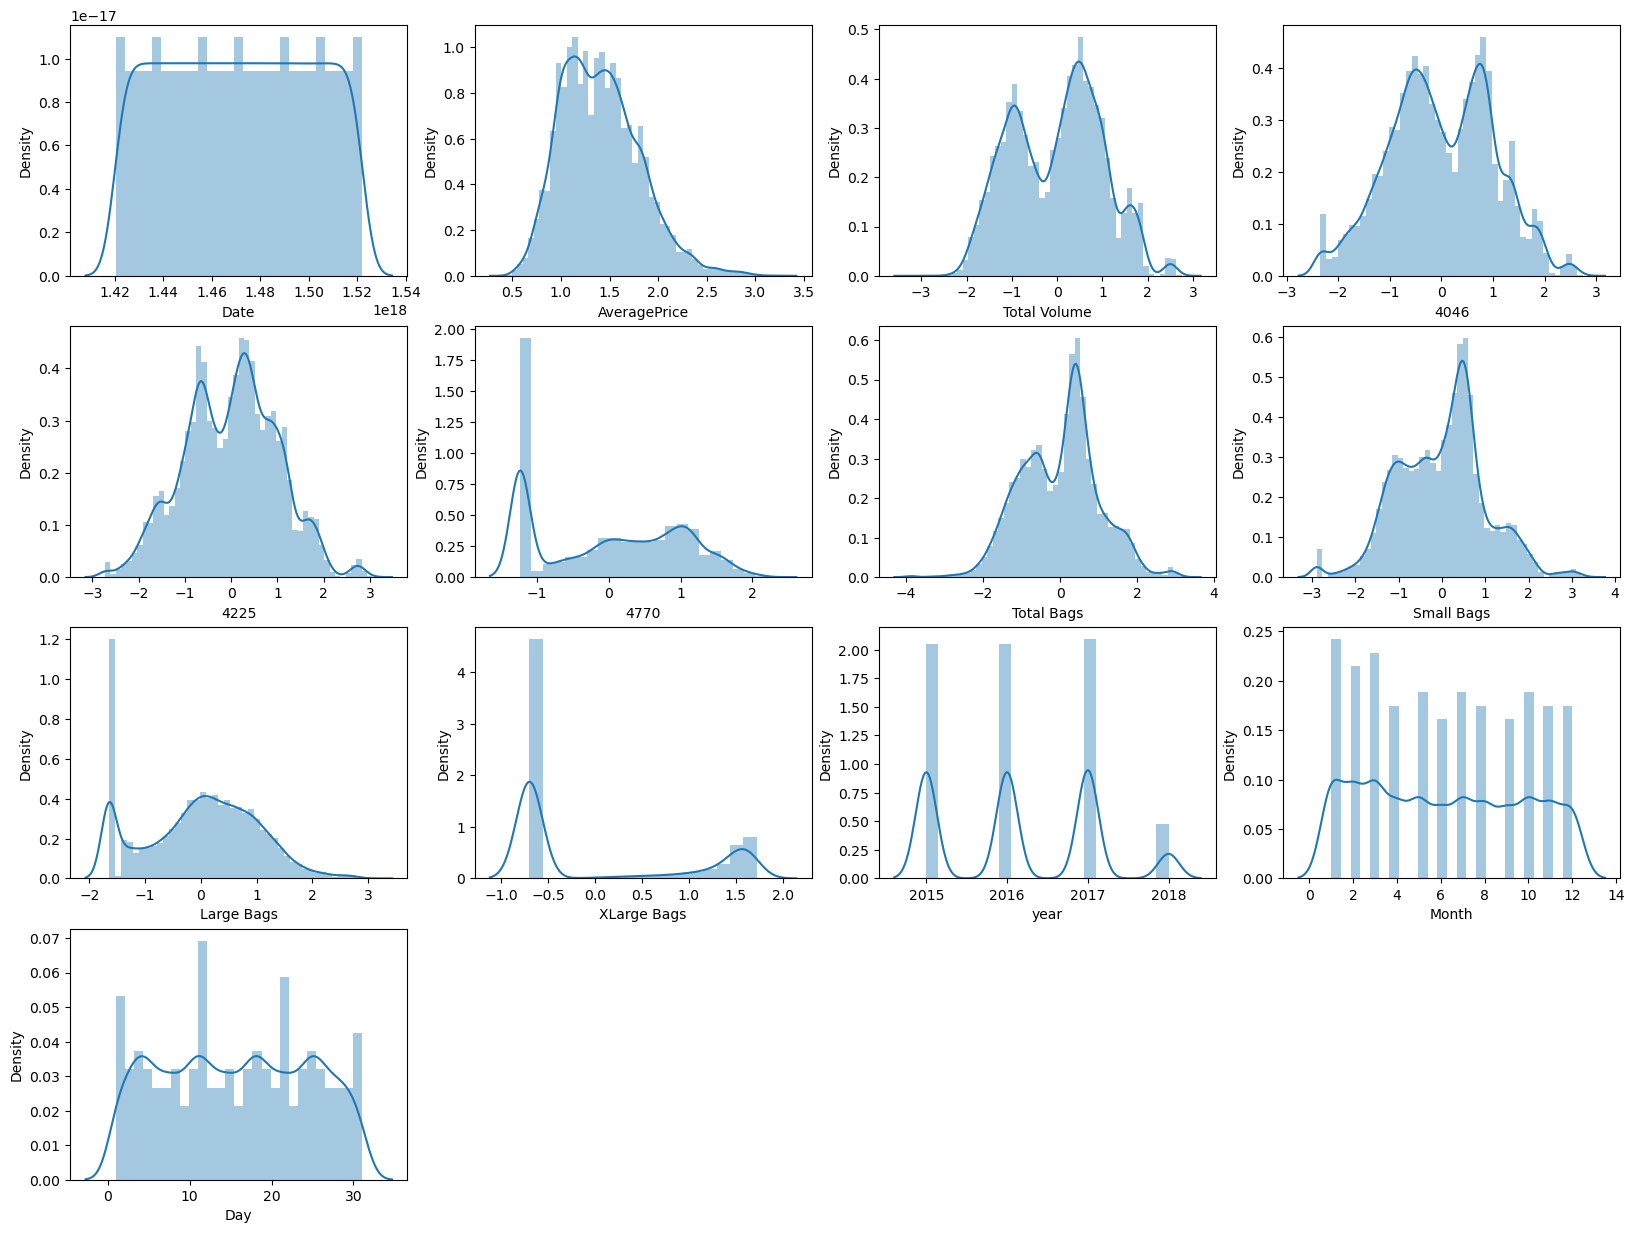

In [61]:
plt.figure(figsize=(20,15))
plotnumber=1


for column in x.columns:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1   
plt.show() 

In [62]:
# Exclude datetime columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the skewness
skewness = numeric_df.skew()

# Print the skewness of each column
print(skewness)


AveragePrice    0.580303
Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
year            0.215339
Month           0.106617
Day             0.014310
dtype: float64


We can conclude that skewness has been successfully eliminated from the dataset.

# Outliers

Eliminating date, categorical, and target variable columns:

In [63]:
x=df.drop(columns=['Date','type','region','AveragePrice'],axis=1)

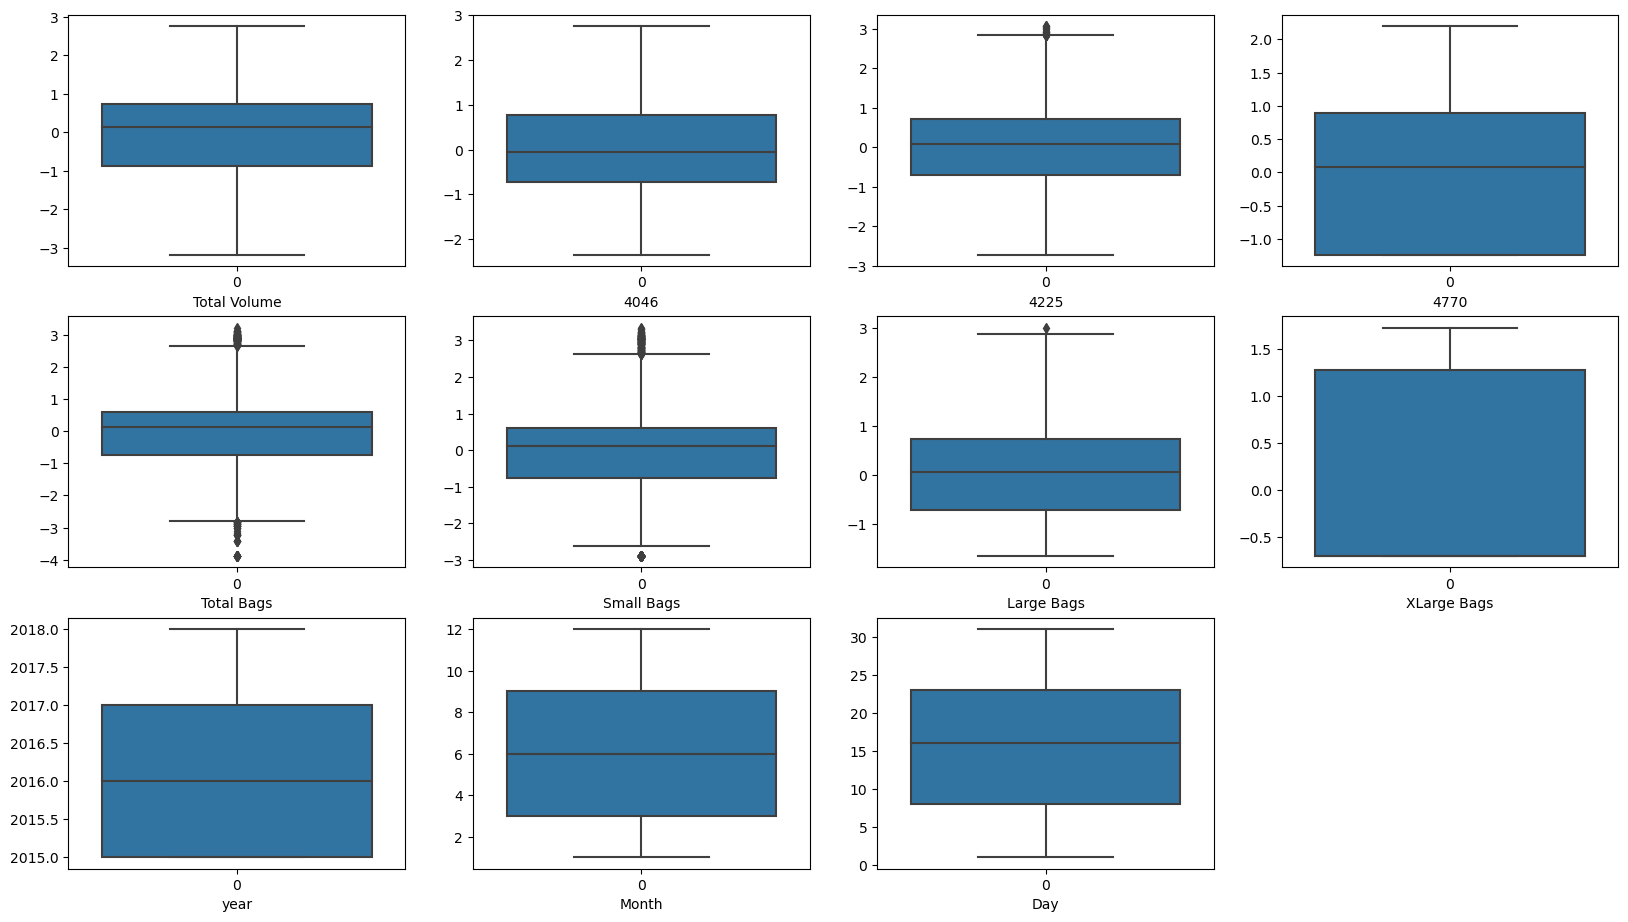

In [64]:
plt.figure(figsize=(20,15))
plotnumber=1


for column in x.columns:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
    plotnumber+=1   
plt.show() 

We observe the presence of outliers in the columns: 4225, Total Bags, Small Bags, and Large Bags.

# Removing outliers using the IQR method:

In [65]:
# Exclude non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate quartiles
q1 = numeric_df.quantile(0.25)
q3 = numeric_df.quantile(0.75)

# Calculate interquartile range (IQR)
IQR = q3 - q1

# Calculate upper and lower bounds for outliers
# upper_bound = q3 + (1.5 * IQR)
# lower_bound = q1 - (1.5 * IQR)


In [66]:
# 4225 

In [67]:
high_4225=(q3['4225']+(1.5*IQR['4225']))


index=np.where(df['4225']> high_4225)

df=df.drop(df.index[index])

In [68]:
#TotalBags

In [69]:
high_tb=(q3['Total Bags']+(1.5*IQR['Total Bags']))


index=np.where(df['Total Bags']> high_tb)

df=df.drop(df.index[index])

In [70]:
#smallBags 

In [71]:
high_sb=(q3['Small Bags']+(1.5*IQR['Small Bags']))


index=np.where(df['Small Bags']> high_sb)

df=df.drop(df.index[index])


In [72]:
# Large Bags 

In [73]:
high_lb=(q3['Large Bags']+(1.5*IQR['Large Bags']))


index=np.where(df['Large Bags']> high_lb)

df=df.drop(df.index[index])

In [74]:
#TotalBags

In [75]:
tb_low=q1['Total Bags']-(1.5*IQR['Total Bags'])

index=np.where(df['Total Bags']<tb_low)

df=df.drop(df.index[index])

In [76]:
#SmallBags 

In [77]:
sb_low=q1['Small Bags']-(1.5*IQR['Small Bags'])

index=np.where(df['Small Bags']<sb_low)

df=df.drop(df.index[index])

In [78]:
df.reset_index()

,index,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,0,2015-12-27,1.33,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,conventional,2015,Albany,12,27
1,1,2015-12-20,1.35,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,conventional,2015,Albany,12,20
2,2,2015-12-13,0.93,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,conventional,2015,Albany,12,13
3,3,2015-12-06,1.08,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,conventional,2015,Albany,12,6
4,4,2015-11-29,1.28,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17898,18244,2018-02-04,1.63,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,organic,2018,WestTexNewMexico,2,4
17899,18245,2018-01-28,1.71,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,organic,2018,WestTexNewMexico,1,28
17900,18246,2018-01-21,1.87,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,organic,2018,WestTexNewMexico,1,21
17901,18247,2018-01-14,1.93,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,organic,2018,WestTexNewMexico,1,14


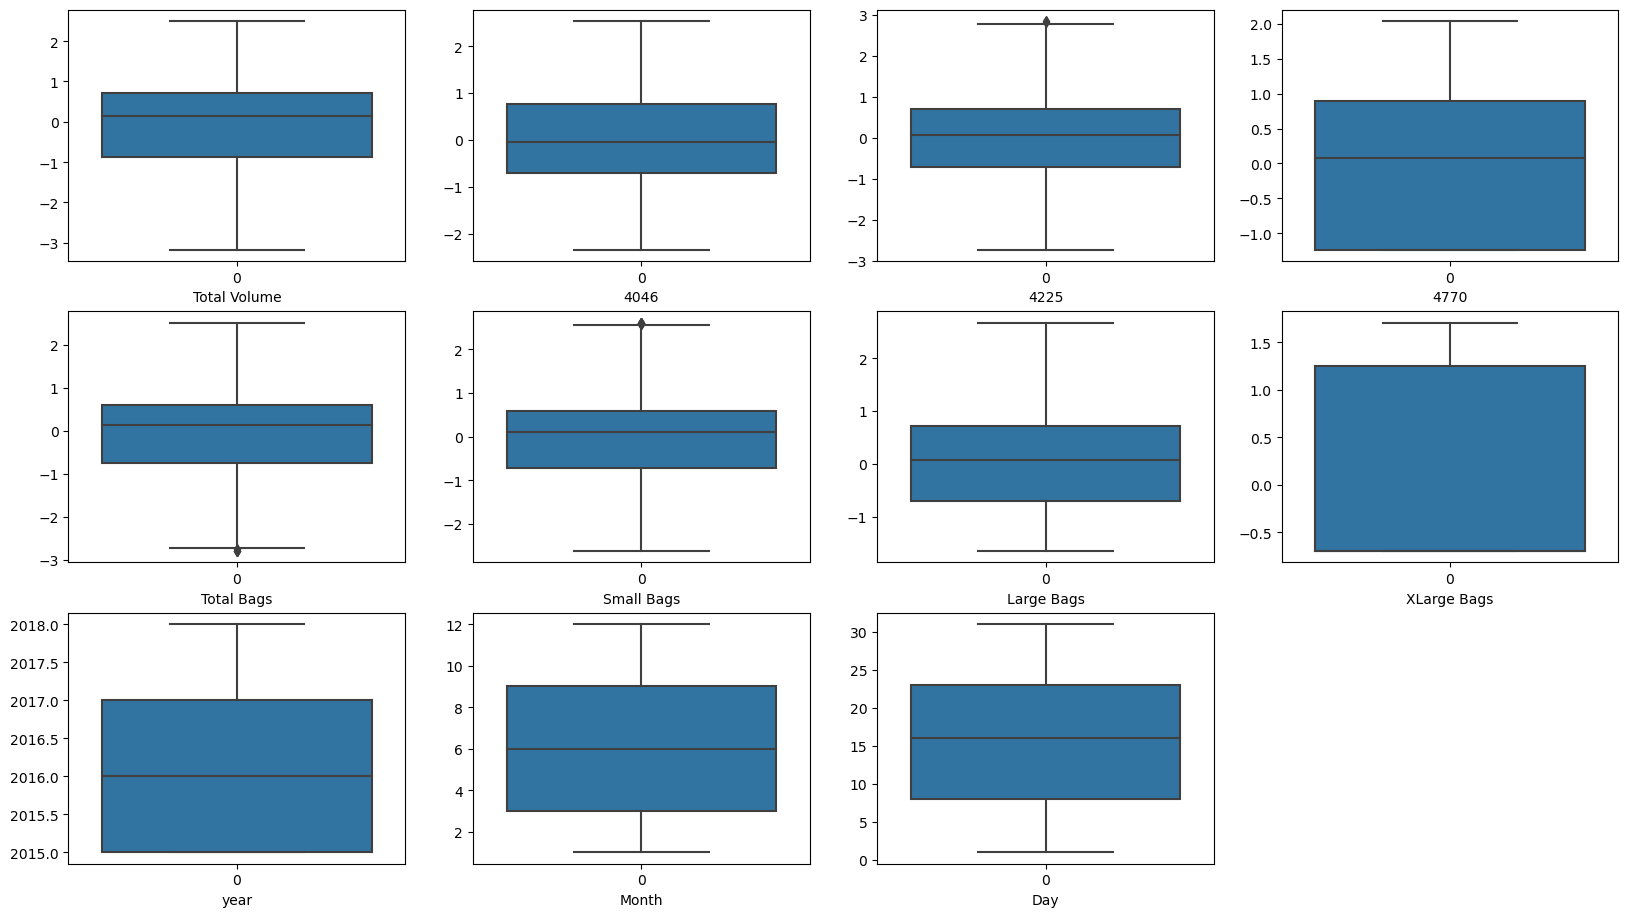

In [79]:
plt.figure(figsize=(20,15))
plotnumber=1


for column in x.columns:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
    plotnumber+=1   
plt.show() 

We observe that a significant portion of outliers has been successfully removed from the dataset.

In [80]:
df.drop(columns=['Date'],inplace=True)

In [81]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,conventional,2015,Albany,12,27
1,1.35,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,conventional,2015,Albany,12,20
2,0.93,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,conventional,2015,Albany,12,13
3,1.08,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,conventional,2015,Albany,12,6
4,1.28,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,organic,2018,WestTexNewMexico,2,4
18245,1.71,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,organic,2018,WestTexNewMexico,1,28
18246,1.87,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,organic,2018,WestTexNewMexico,1,21
18247,1.93,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,organic,2018,WestTexNewMexico,1,14


# Encoding of the object data-

In [82]:
object

['type', 'region']

Implementing Binary Encoding on the 'region' column due to the large number of categories:

In [83]:
from category_encoders import BinaryEncoder
b=BinaryEncoder()
new_df=b.fit_transform(df['region'])
new_df

ModuleNotFoundError: No module named 'category_encoders'

Concatenating the original DataFrame with the encoded data:

In [ ]:
df = pd.concat([df, new_df], axis=1)
df.drop(columns="region",inplace=True)
df

We can confirm that the 'region' column has been successfully encoded and concatenated with the main DataFrame.

Applying Label Encoder to the 'type' column as there are only two categories:

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df1=le.fit_transform(df['type'])
pd.Series(df1)

In [ ]:
df['type']=df1

In [ ]:
df

We observe that the 'type' column has been successfully encoded using the Label Encoder method.

In [ ]:
df.dtypes

It is evident that all categorical data has been effectively encoded into numeric format.

In [ ]:
df.describe()

- The dataset contains a total of 17,896 records.
- The 'AveragePrice' column has a mean value of approximately 1.41, with a standard deviation of 0.40. The minimum and maximum values are 0.44 and 3.25, respectively.
- For the 'Total Volume' column, the mean is approximately -0.01, with a standard deviation of 0.97. The minimum and maximum values are -3.17 and 2.45, respectively.
- Similar statistics are provided for other numeric columns such as '4046', '4225', '4770', 'Total Bags', 'Small Bags', and 'Large Bags'.
- The 'type' column has been encoded, with a mean of approximately 0.50.
- The 'year' column ranges from 2015 to 2018, with a mean value of approximately 2016.16.
- The 'Month' column ranges from 1 to 12, with a mean value of approximately 6.18.
- The 'Day' column ranges from 1 to 31, with a mean value of approximately 15.66.
- Encoded 'region' columns (region_0 to region_5) have mean values ranging between 0.42 and 0.51.



In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linecolor='black',linewidth=0.2,annot_kws={'fontsize': 16,'fontweight': 'bold'})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show() 

Observations:

1. There exists an 89% positive correlation between 'Total Volume' and '4046'.
2. '4225' and 'Total Volume' exhibit a 92% positive correlation.
3. A positive correlation of 82% is observed between 'Total Volume' and '4770'.
4. 'Total Volume' and 'Total Bags' display a 95% positive correlation.
5. 'Total Volume' and 'Small Bags' have a positive correlation of 92%.
6. There is an 83% positive correlation between '4225' and 'Total Bags'.
7. A negative correlation of 80% is noted between 'type' and 'Total Volume'.
8. 'type' demonstrates a negative correlation of 78% with '4770'.
9. 'type' exhibits a negative correlation of 73% with '4046'.
10. A negative correlation of 75% is observed between '4225' and 'type'.
11. 'Total Bags' and 'type' display a negative correlation of 73%.
12. 'Small Bags' and 'type' have a negative correlation of 73%.


# Correlation between features and the target variable:

In [ ]:
df.corr()['AveragePrice'].sort_values(ascending=False).to_frame()

# Graphical depiction of the relationship between features and the target variable:

In [ ]:
plt.figure(figsize=(20,10))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Label')
plt.xticks(fontsize=14)
plt.title('Correlation between label and features using barplot')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Observations on the correlation between features and the target variable:

1. The type of avocados demonstrates the highest correlation with the target variable, with a correlation coefficient of 61%.
2. Features such as 'Total Volume', 'Total Bags', '4046', 'Small Bags', '4770', 'Large Bags', and '4225' exhibit a strong negative correlation with the target variable 'AveragePrice'.
3. 'Day', 'Year', and 'Region' columns show very weak correlations with the average price.

In [ ]:
df

# Preparing Data for Machine Learning

# Splitting

Choose the dependent(label)and independent variables

In [ ]:
X = df.drop('AveragePrice', axis=1)
Y = df['AveragePrice']

In [ ]:
X

In [ ]:
X.shape

In [ ]:
Y

In [ ]:
Y.shape

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

To address potential bias stemming from variations in decimal places across feature columns, I've opted to standardize all the features using the Standard Scaler method. This technique ensures that all feature columns have comparable scales, which can enhance the performance and stability of my model.

# Assessing multicollinearity among features.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

We've identified higher VIF (Variance Inflation Factor) values in the 'Total Volume', 'Total Bags', and 'Small Bags' columns, surpassing the acceptable range. Consequently, we need to drop these columns to mitigate multicollinearity among features.

In [ ]:
X=X.drop(columns=['Total Volume','Total Bags',],axis=1)
X

In [ ]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

The multicollinearity among features has been successfully mitigated, allowing us to proceed with model building.

In [ ]:
df.corr()['AveragePrice']

# Model Building-1

In [ ]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)

20% of the dataset will be used for testing, and the remaining 80% for training our machine learning models.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
print()
def evaluate_regression(model, X, Y):
    print('Model Name:',model)
    # Splitting data into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting y_test
    pred = model.predict(X_test)
    
    # Predicting y_train
    train = model.predict(X_train)
    
    
    # R-squared Score
    r2 = r2_score(Y_test, pred)
    print("R-squared Score:", r2)
    
    #R-squared Score on training data
    r3 = r2_score(Y_train, train)
    print("R-squared Score on training data:", r3*100)
    
    # Mean Absolute Error
    mae = mean_absolute_error(Y_test, pred)
    print("Mean Absolute Error:", mae)
    
    # Mean Squared Error
    mse = mean_squared_error(Y_test, pred)
    print("Mean Squared Error:", mse)
    
    # Root Mean Squared Error
    rmse =np.sqrt(mean_squared_error(Y_test, pred))
    print("Root Mean Squared Error:", rmse)
    
    
    
    # Cross Validation Score
    cv_score = cross_val_score(model, X, Y, cv=5, scoring='r2') 
    print("\nCross Validation Score:", cv_score)
    print("Cross Validation Score Mean:", cv_score.mean())
    
    # Result of accuracy minus cv scores
    result = r2 - cv_score.mean()
    print("R-squared Score - Cross Validation Score is", result*100)


In [ ]:
# Linear Regression
LR = LinearRegression()
evaluate_regression(LR,X, Y)

In [ ]:
# Ridge Regressor
RDG = Ridge()
evaluate_regression(RDG,X, Y)

In [ ]:
# Lasso Regressor
LS = Lasso()
evaluate_regression(LS,X, Y)

In [ ]:
# Decision Tree Regression
DT = DecisionTreeRegressor()
evaluate_regression(DT,X, Y)

In [ ]:
# Random Forest Regression
RFR = RandomForestRegressor()
evaluate_regression(RFR,X, Y)

In [ ]:
# Extra Tree Regression
ETR = ExtraTreesRegressor()
evaluate_regression(ETR,X, Y)

In [ ]:
# ADA Boost Regressor
ABR = AdaBoostRegressor()
evaluate_regression(ABR,X, Y)

In [ ]:
# GradientBoostingRegressor
GBR = GradientBoostingRegressor()
evaluate_regression(GBR,X, Y)

In [ ]:
# XGBRegressor
XGBR = XGBRegressor()
evaluate_regression(XGBR,X, Y)

# summary of the evaluation metrics for each model:

1. LinearRegression:
   - R-squared Score: 0.5441
   - Cross Validation Score Mean: 0.1126
   - Difference between R-squared Score and Cross Validation Score: 43.1489

2. Ridge:
   - R-squared Score: 0.5441
   - Cross Validation Score Mean: 0.1127
   - Difference between R-squared Score and Cross Validation Score: 43.1449

3. Lasso:
   - R-squared Score: -0.0005
   - Cross Validation Score Mean: -1.1926
   - Difference between R-squared Score and Cross Validation Score: 119.2121

4. DecisionTreeRegressor:
   - R-squared Score: 0.7764
   - Cross Validation Score Mean: -0.2421
   - Difference between R-squared Score and Cross Validation Score: 101.8511

5. RandomForestRegressor:
   - R-squared Score: 0.8933
   - Cross Validation Score Mean: 0.2331
   - Difference between R-squared Score and Cross Validation Score: 66.0172

6. ExtraTreesRegressor (Best Model):
   - R-squared Score: 0.9336
   - Cross Validation Score Mean: 0.3239
   - Difference between R-squared Score and Cross Validation Score: 60.9709

7. AdaBoostRegressor:
   - R-squared Score: 0.5689
   - Cross Validation Score Mean: -0.0192
   - Difference between R-squared Score and Cross Validation Score: 58.8093

8. GradientBoostingRegressor:
   - R-squared Score: 0.7345
   - Cross Validation Score Mean: 0.3477
   - Difference between R-squared Score and Cross Validation Score: 38.6743

9. XGBRegressor:
   - R-squared Score: 0.8992
   - Cross Validation Score Mean: 0.4239
   - Difference between R-squared Score and Cross Validation Score: 47.5299

Among these models, the ExtraTreesRegressor stands out with the highest R-squared score and the least difference between R-squared score and cross-validation score, indicating strong performance and generalization capability.

# Hyper parameter tuning on the best ML Model

In [ ]:
# Choosing the  ExtraTreesRegressor  as best model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=ETR, param_grid=param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, Y_train)

In [ ]:
best_params = grid_search.best_params_
best_params

In [ ]:
final_model_1 = ExtraTreesRegressor(bootstrap=False,
                                    max_depth=None,
                                    min_samples_leaf=1,
                                    min_samples_split=2,
                                    n_estimators=200, random_state=maxrs)

In [ ]:
final_model_1.fit(x_train,y_train)

In [ ]:
pred=final_model_1.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test, pred)

In [ ]:
print("Mean Squared Error:", mse)

In [ ]:
r2_score(Y_test,pred)

# Saving the model

In [ ]:
import joblib
filename = "FinalModel_5.pkl"
joblib.dump(final_model_1, filename)

In [ ]:
model=joblib.load("FinalModel_5.pkl")

prediction=model.predict(X_test)
prediction

In [ ]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df

In [ ]:
df.tail()

 Plotting the disparity between predicted and actual values aids in comprehending the discrepancy more effectively.

In [ ]:
# Calculate residuals
residuals = prediction - Y_test

# Create KDE plot of residuals
sns.displot(residuals, kind='kde')

# Add labels and title
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Residuals')

# Show the plot
plt.show()

# 2.Classification Problem(Predicting Region-)

# Import important library :

In [ ]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

# from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [ ]:
df

In [ ]:
df.nunique().to_frame('No of unique values')

# Encoding of the object data-

Using label encoding on the "type" and "region" columns.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [ ]:
df1=le.fit_transform(df['type'])
pd.Series(df1)

In [ ]:
df['type']=df1
df

In [ ]:
df2=le.fit_transform(df['region'])
pd.Series(df2)


In [ ]:
df2=le.fit_transform(df['region'])
pd.Series(df2)


In [ ]:
df['region']=df2
df

In [ ]:
df.dtypes

In [ ]:
df.corr()['region'].sort_values(ascending=False).to_frame()

In [ ]:
# Graphical depiction of the relationship between features and the target variable:

In [ ]:
plt.figure(figsize=(20,10))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Label')
plt.xticks(fontsize=14)
plt.title('Correlation between label and features using barplot')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Observations:
- Column "4046" exhibits the strongest correlation with the target variable.
- Other columns like "Large Bags", "Total Bags", "Total Volume", and "Small Bags" also demonstrate significant relationships with the target variable.
- Conversely, "Day" and "Month" as well as "XLarge Bags" show the weakest relationships with the target variable.

In [ ]:
df=df.drop(columns=['type','year','Month','Day','XLarge Bags','AveragePrice'],axis=1)
df

# Preparing Data for Machine Learning

# Splitting

Choose the dependent(label)and independent variables.

In [ ]:
X = df.drop('region', axis=1)
Y = df['region']

I've split the dataset into features and labels, with X representing all the feature columns and Y representing the target label column.

In [ ]:
X

In [ ]:
Y

# Feature Scaling

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

In [ ]:
Y

In [ ]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

Here, we observe that the VIF (Variance Inflation Factor) exceeds the acceptable range in the columns for "Total Volume", "Total Bags", and "Small Bags". Hence, we need to drop these columns to alleviate multicollinearity among features.

In [ ]:
X=X.drop(columns=['Total Volume','Total Bags',],axis=1)
X

In [ ]:
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features']=X.columns
vif

We can observe that multicollinearity has been successfully mitigated among the features. Now, we can proceed further with the model building process.

In [ ]:
Y.value_counts()

We notice that the data is unbalanced, hence we will balance it using the oversampling method.

In [ ]:
# We're adding samples to ensure an equal number of instances for all categorical quality values.
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [ ]:
Y.value_counts()

In [ ]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)   
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

# Creating the training and testing data sets

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)

20% of the dataset will be used for testing, and the remaining 80% for training our machine learning models.

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
Y_train.shape

In [ ]:
Y_test.shape

# Machine Learning Model for Classification and Evaluation Metrics

In [ ]:
# Classification Model Function
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    #Confusion Matrix
    confusion_matx=confusion_matrix(Y_test, pred)
    print("\nConfusion Matrix:\n",confusion_matx)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("\nCross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I've created a class to handle train-test splitting, model training, label prediction, accuracy score calculation, classification report generation, cross-validation scoring,Confusion Matrix, and comparison of accuracy and cross-validation scores for any machine learning model that utilizes this function.

In [ ]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

In [ ]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

In [ ]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

In [ ]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

In [ ]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

In [ ]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

In [ ]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

# ETRA TREES CLASSIFIER IS OUR BEST MODEL BECAUSE IT HAS Diffrence between Accuracy score and cross validation score is LEAST

# Hyper parameter tuning on the best ML Model

In [ ]:
# ExtraTrees Classifier
from sklearn.model_selection import GridSearchCV

param_grid ={'criterion':['gini','entropy'],
           'random_state':[10,50,1000],
           'max_depth':[0,10,20],
           'n_jobs':[-2,-1,1],
           'n_estimators':[50,100,200,300]}

In [ ]:
ETC=ExtraTreesClassifier()

In [ ]:
grid_search= GridSearchCV(estimator=ETC, param_grid=param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, Y_train)

In [ ]:
grid_search.best_params_

In [ ]:
final_model_2=ExtraTreesClassifier(criterion='gini',max_depth=20,n_estimators=300,n_jobs=-2,random_state=1000)

In [ ]:
final_model_2.fit(X_train,Y_train)
pred=final_model_2.predict(X_test)
acc=accuracy_score(Y_test,pred)
print(acc*100)

# Saving the model

In [ ]:
import joblib

filename = "FinalModel_6.pkl"
joblib.dump(final_model_2, filename)

In [ ]:
model=joblib.load("FinalModel_6.pkl")

prediction=model.predict(X_test)
prediction

In [ ]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df.head()

In [ ]:
df.tail()